# <p style="background-color:purple;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b> Simple and Multiple Linear Regression</b></p>

In [1]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install seaborn

#!pip install scikit-learn 
#!pip install sklearn
#!pip install missingno 
#!pip install summarytools
#!pip install ydata-profiling

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (8, 4)

import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

## Read Data Set

In [2]:
df = pd.read_csv("co2.csv")
df

Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                               9.9   
1              M6         Z                              11.2   
2             AV7         Z                               6.0   
3             AS6         Z                              12.7   
4             AS6         Z                              12.1   
...           ...       ...                               ...   
7380          AS8         Z                              10.7   
7381          AS8         Z                              11.2   
7382          AS8         Z                              11.7   
7383          AS8         Z                              11.2   
7384          AS8         Z                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                                 6.7                               8.5   
1                                 7.7                               9.6   
2                                 5.8                               5.9   
3                                 9.1                              11.1   
4                                 8.7                              10.6   
...                               ...                               ...   
7380                              7.7                               9.4   
7381                              8.3                               9.9   
7382                              8.6                              10.3   
7383                              8.3                               9.9   
7384                              8.7                              10.7   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                              33                  196  
1                              29                  221  
2                              48                  136  
3                              25                  255  
4                              27                  244  
...                           ...                  ...  
7380                           30                  219  
7381                           29                  232  
7382                           27                  240  
7383                           29                  232  
7384                           26                  248  

[7385 rows x 12 columns]

## Data Preparation -  EDA

In [251]:
df.shape

(7385, 12)

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [6]:
df.isnull()

Make  Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0     False  False          False           False      False         False   
1     False  False          False           False      False         False   
2     False  False          False           False      False         False   
3     False  False          False           False      False         False   
4     False  False          False           False      False         False   
...     ...    ...            ...             ...        ...           ...   
7380  False  False          False           False      False         False   
7381  False  False          False           False      False         False   
7382  False  False          False           False      False         False   
7383  False  False          False           False      False         False   
7384  False  False          False           False      False         False   

      Fuel Type  Fuel Consumption City (L/100 km)  \
0         False                             False   
1         False                             False   
2         False                             False   
3         False                             False   
4         False                             False   
...         ...                               ...   
7380      False                             False   
7381      False                             False   
7382      False                             False   
7383      False                             False   
7384      False                             False   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                               False                             False   
1                               False                             False   
2                               False                             False   
3                               False                             False   
4                               False                             False   
...                               ...                               ...   
7380                            False                             False   
7381                            False                             False   
7382                            False                             False   
7383                            False                             False   
7384                            False                             False   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                           False                False  
1                           False                False  
2                           False                False  
3                           False                False  
4                           False                False  
...                           ...                  ...  
7380                        False                False  
7381                        False                False  
7382                        False                False  
7383                        False                False  
7384                        False                False  

[7385 rows x 12 columns]

In [7]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [8]:
!pip install missingno 


In [9]:
import missingno as msno

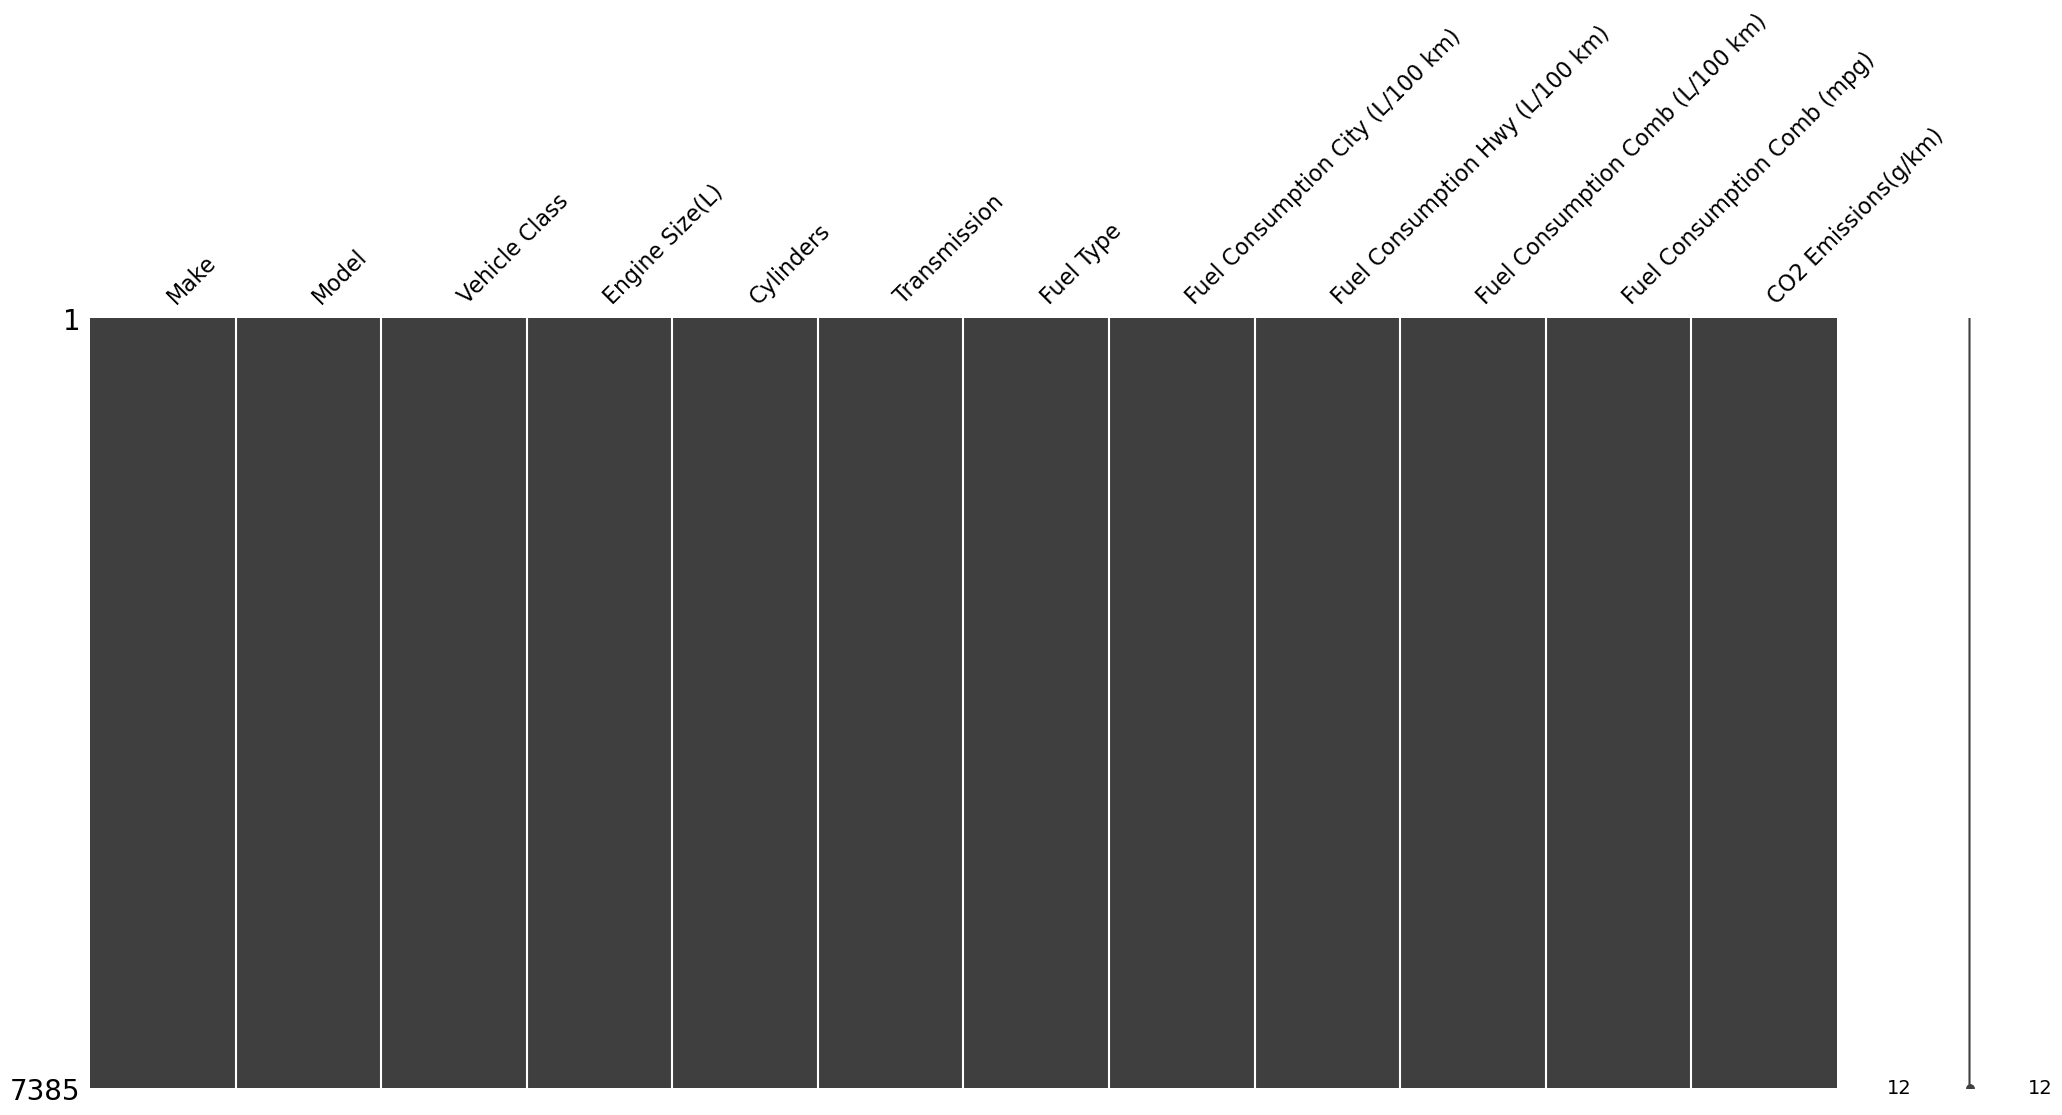

In [10]:
msno.matrix(df);

<Axes: >

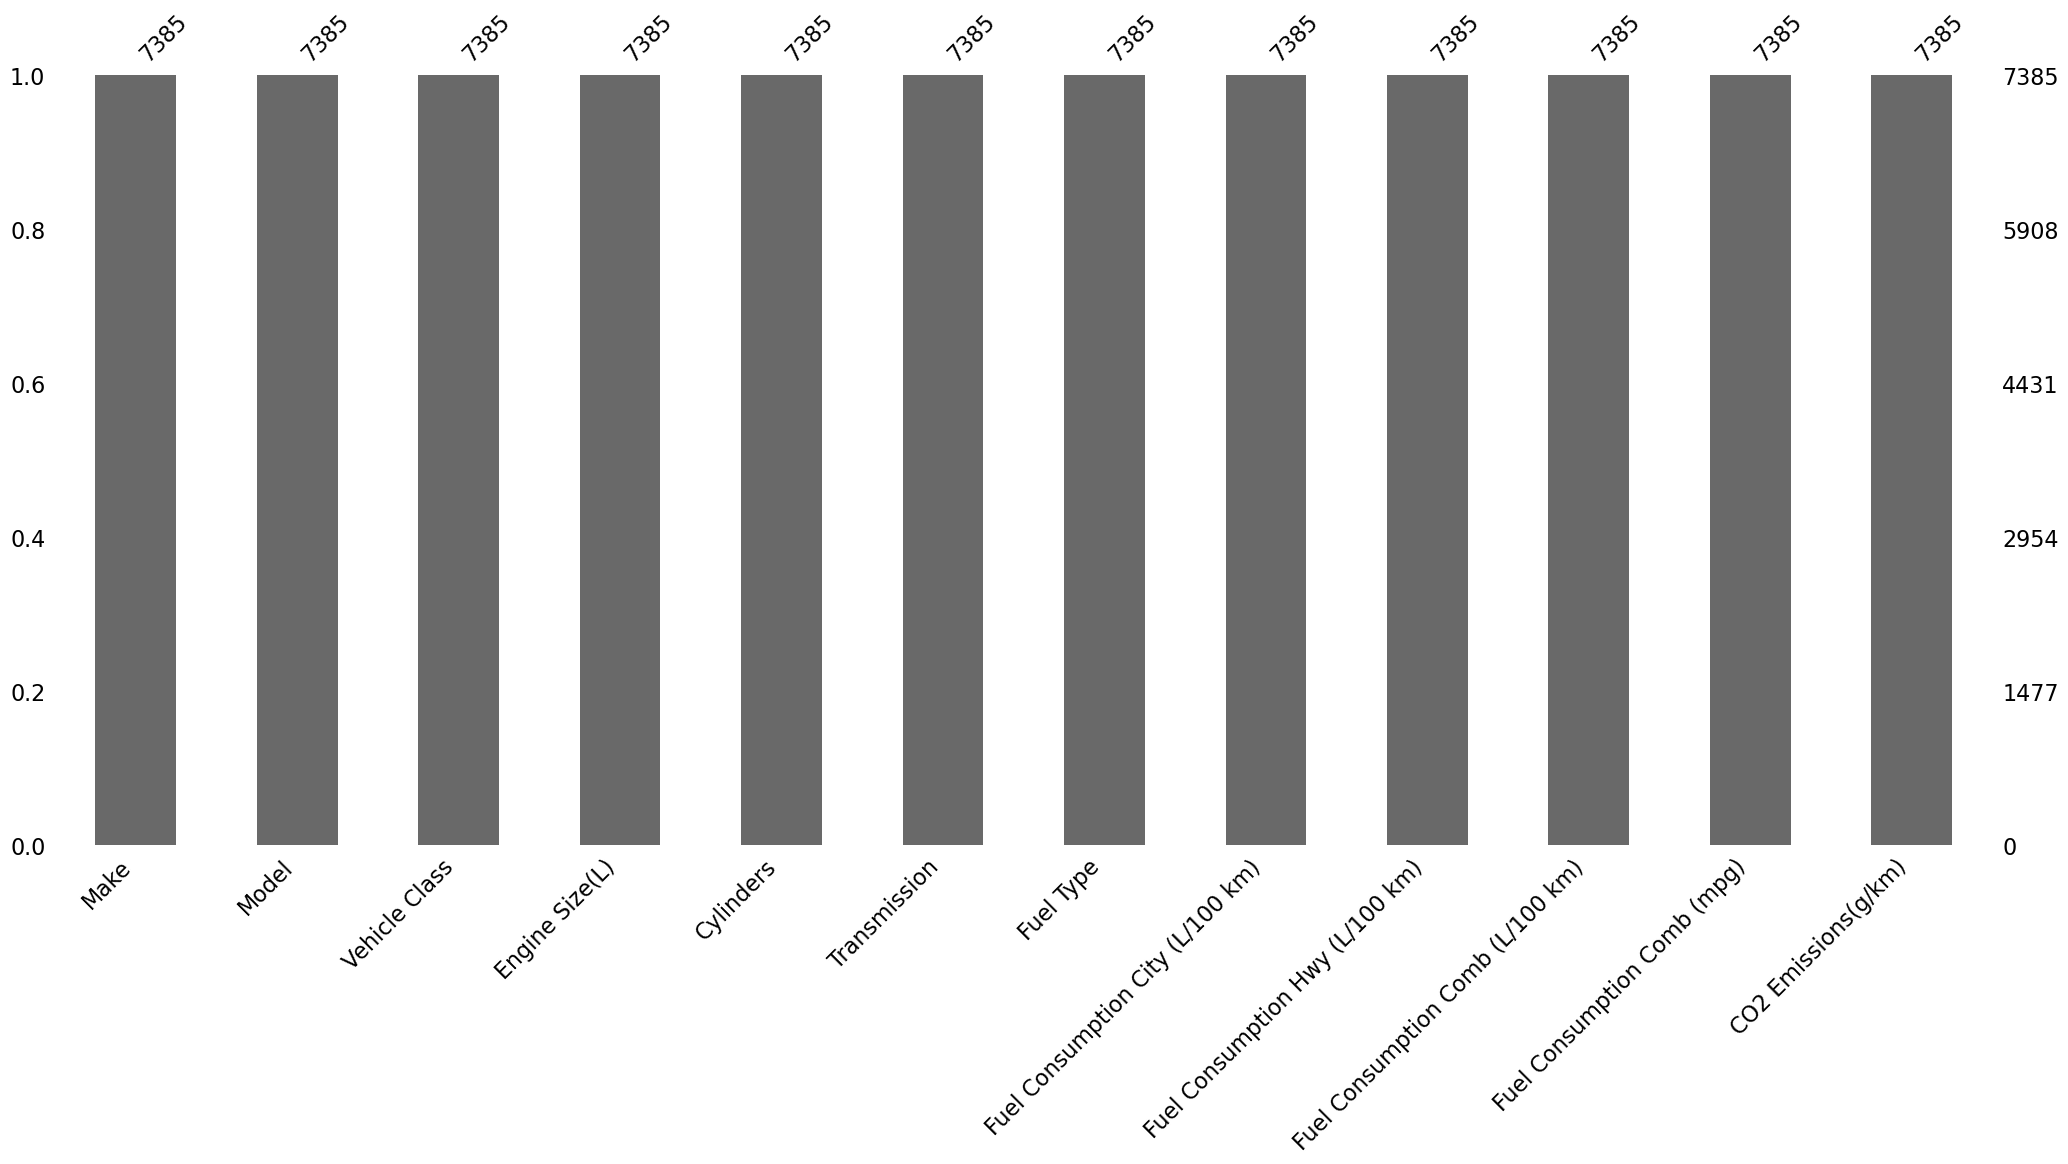

In [11]:
msno.bar(df)

In [12]:
df.sort_values(by="CO2 Emissions(g/km)", ascending=False)

Make               Model Vehicle Class  Engine Size(L)  \
5575      BUGATTI              Chiron    TWO-SEATER             8.0   
6640      BUGATTI              Chiron    TWO-SEATER             8.0   
4509      BUGATTI              CHIRON    TWO-SEATER             8.0   
7059  LAMBORGHINI  Aventador Roadster    TWO-SEATER             6.5   
6046  LAMBORGHINI  Aventador Roadster    TWO-SEATER             6.5   
...           ...                 ...           ...             ...   
6949      HYUNDAI               IONIQ     FULL-SIZE             1.6   
5931      HYUNDAI          IONIQ Blue     FULL-SIZE             1.6   
4900      HYUNDAI          IONIQ BLUE     FULL-SIZE             1.6   
6950      HYUNDAI          IONIQ Blue     FULL-SIZE             1.6   
3824      HYUNDAI          IONIQ BLUE     FULL-SIZE             1.6   

      Cylinders Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
5575         16          AM7         Z                              26.8   
6640         16          AM7         Z                              26.8   
4509         16          AM7         Z                              26.8   
7059         12          AM7         Z                              26.6   
6046         12          AM7         Z                              26.6   
...         ...          ...       ...                               ...   
6949          4          AM6         X                               4.2   
5931          4          AM6         X                               4.2   
4900          4          AM6         X                               4.2   
6950          4          AM6         X                               4.2   
3824          4          AM6         X                               4.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
5575                             16.6                              22.2   
6640                             16.6                              22.2   
4509                             16.6                              22.2   
7059                             15.8                              21.7   
6046                             15.8                              21.7   
...                               ...                               ...   
6949                              4.2                               4.2   
5931                              4.0                               4.1   
4900                              4.0                               4.1   
6950                              4.0                               4.1   
3824                              4.0                               4.1   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
5575                           13                  522  
6640                           13                  522  
4509                           13                  522  
7059                           13                  493  
6046                           13                  493  
...                           ...                  ...  
6949                           67                   99  
5931                           69                   96  
4900                           69                   96  
6950                           69                   96  
3824                           69                   96  

[7385 rows x 12 columns]

In [13]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [14]:
df.describe().T

count        mean        std   min    25%  \
Engine Size(L)                    7385.0    3.160068   1.354170   0.9    2.0   
Cylinders                         7385.0    5.615030   1.828307   3.0    4.0   
Fuel Consumption City (L/100 km)  7385.0   12.556534   3.500274   4.2   10.1   
Fuel Consumption Hwy (L/100 km)   7385.0    9.041706   2.224456   4.0    7.5   
Fuel Consumption Comb (L/100 km)  7385.0   10.975071   2.892506   4.1    8.9   
Fuel Consumption Comb (mpg)       7385.0   27.481652   7.231879  11.0   22.0   
CO2 Emissions(g/km)               7385.0  250.584699  58.512679  96.0  208.0   

                                    50%    75%    max  
Engine Size(L)                      3.0    3.7    8.4  
Cylinders                           6.0    6.0   16.0  
Fuel Consumption City (L/100 km)   12.1   14.6   30.6  
Fuel Consumption Hwy (L/100 km)     8.7   10.2   20.6  
Fuel Consumption Comb (L/100 km)   10.6   12.6   26.1  
Fuel Consumption Comb (mpg)        27.0   32.0   69.0  
CO2 Emissions(g/km)               246.0  288.0  522.0

**-Motor Hacmi (Engine Size) ile Silindir Sayısı (Cylinders) arasında 0.93,
-Motor Hacmi ile CO2 Emisyonları (CO2 Emissions) arasında 0.85,
-Şehir İçi Yakıt Tüketimi (Fuel Consumption City) ile Kombine Yakıt Tüketimi (Fuel Consumption Comb) arasında 0.99,
-Otoyol Yakıt Tüketimi (Fuel Consumption Hwy) ile Kombine Yakıt Tüketimi arasında 0.98 gibi oldukça yüksek
korelasyonlar bulunmaktadır.
Bu korelasyonlar, değişkenlerin birbiriyle çok yakın ilişkili olduğunu ve 
potansiyel olarak çoklu bağlantılılık sorununa işaret ettiğini gösterir. Korelasyon katsayısı genellikle +0.80 
veya daha yüksek olduğunda çoklu bağlantılılık sorunu olduğu kabul edilir**

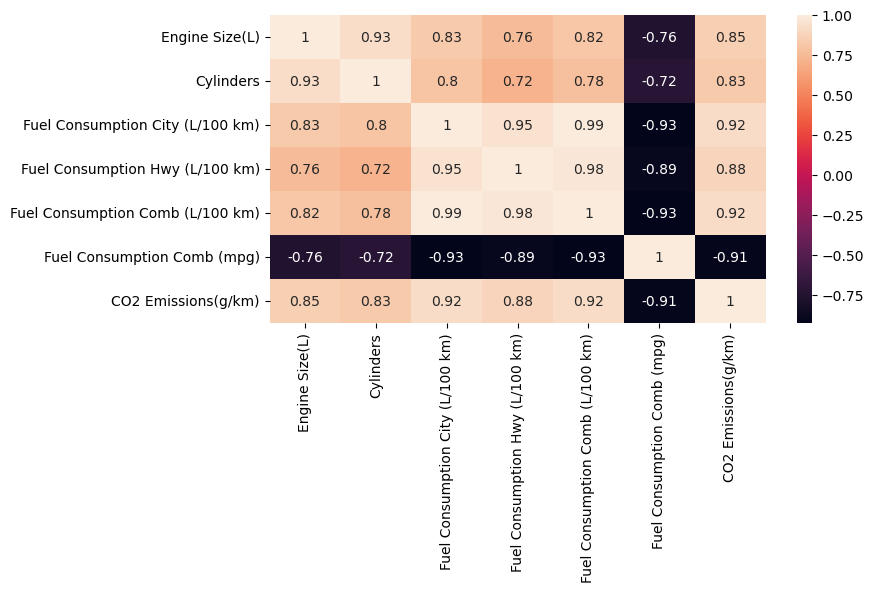

In [15]:
sns.heatmap(df.corr(numeric_only=True), annot=True);

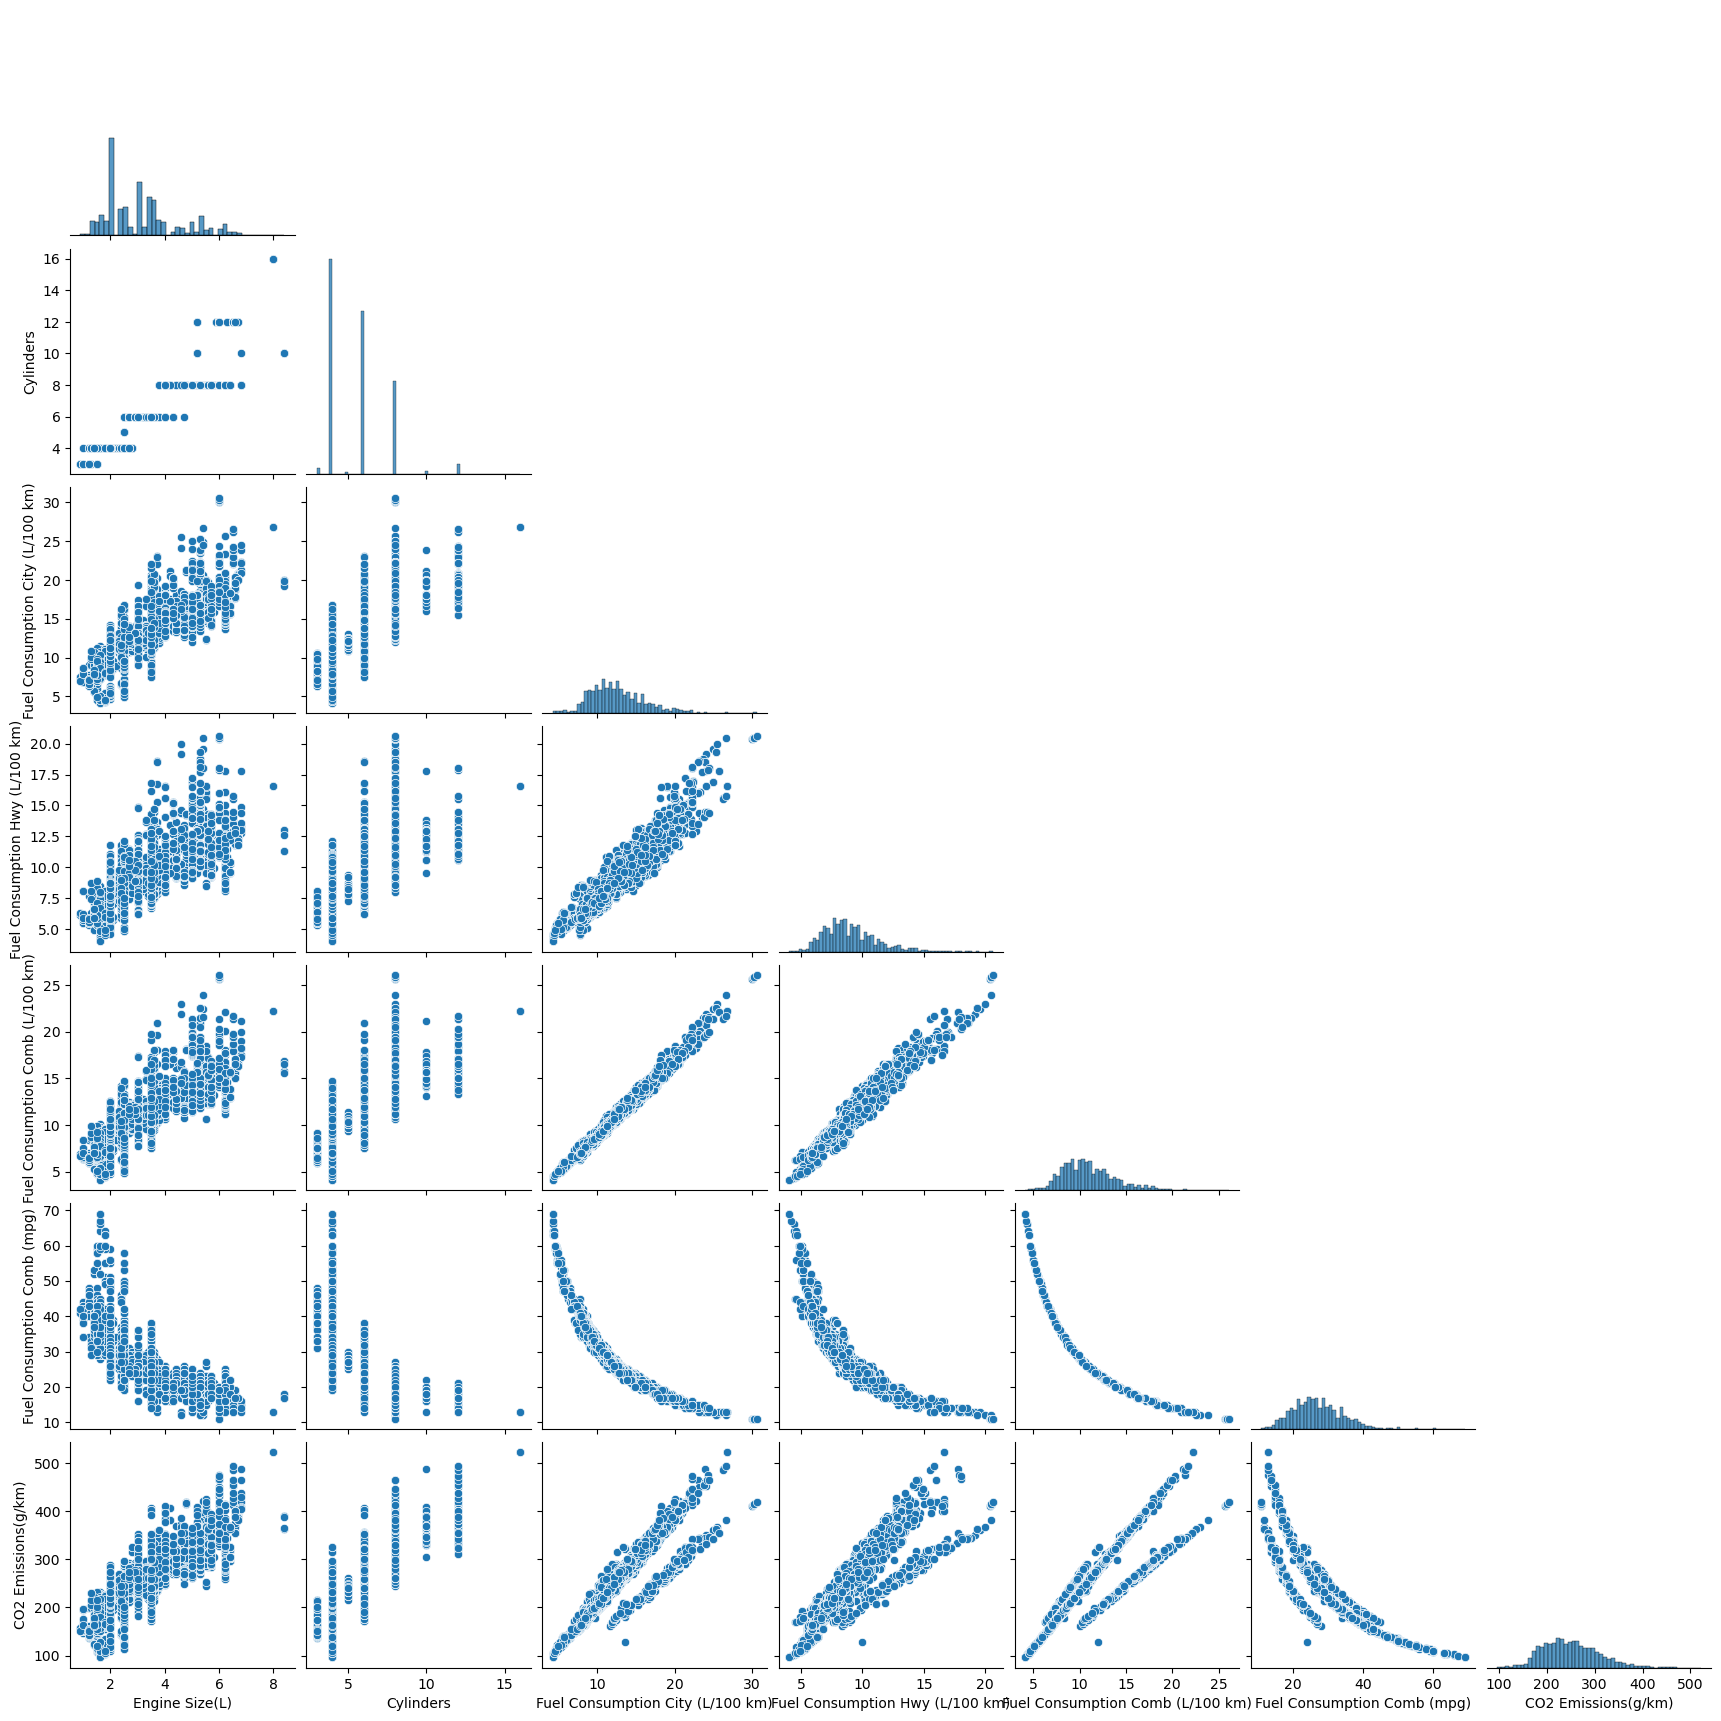

In [16]:
sns.pairplot(df, 
             corner=True)

plt.show()

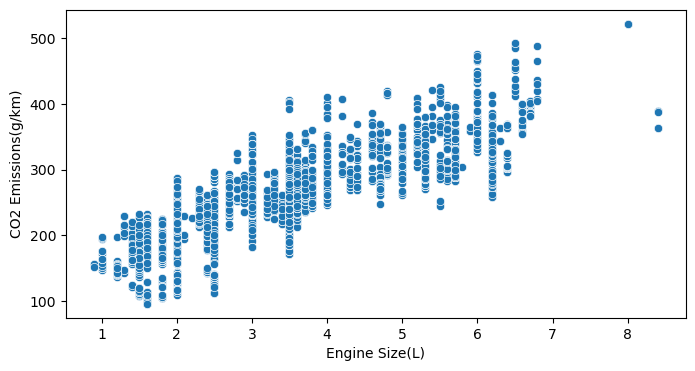

In [17]:
sns.scatterplot(x = "Engine Size(L)", y = "CO2 Emissions(g/km)", data = df);

In [18]:
from scipy.stats import skew

bu değerlerin her biri +1'e yakın olduğu için, dağılımların hafiften orta dereceye kadar sağa çarpık olduğunu söyleyebiliriz. Bu, veri analizi ve modelleme sürecinde bazı veri dönüşümleri veya normalleştirme tekniklerinin uygulanmasını gerektirebilir.

In [19]:
df_filtered = df.drop(columns="CO2 Emissions(g/km)")

numeric_cols = df_filtered.select_dtypes(include=['number']).columns

for col_name in numeric_cols:
    
    column_skewness = skew(df_filtered[col_name].dropna())
    print(f"{col_name}: {column_skewness}")


Engine Size(L): 0.8090166237091084
Cylinders: 1.1101898640440213
Fuel Consumption City (L/100 km): 0.8088403827811873
Fuel Consumption Hwy (L/100 km): 1.078997475325438
Fuel Consumption Comb (L/100 km): 0.8931342662031229
Fuel Consumption Comb (mpg): 0.9768356000735062


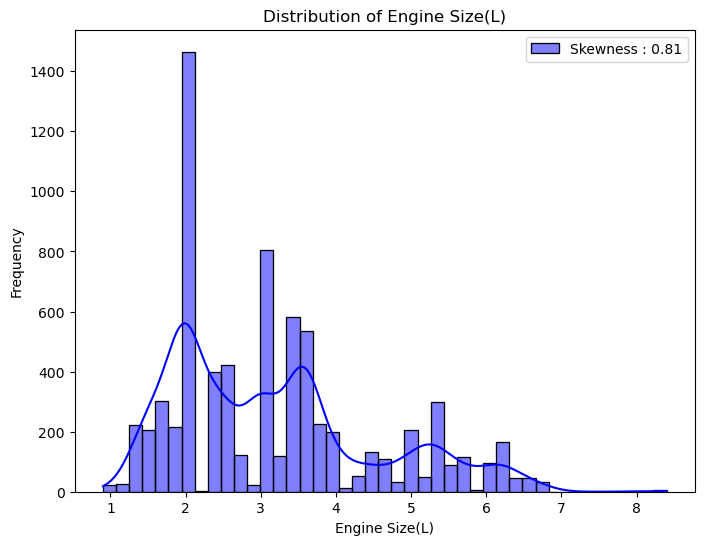

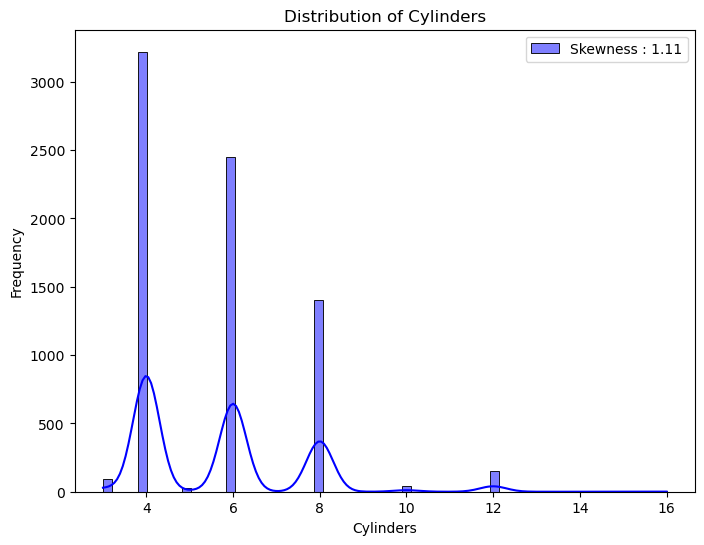

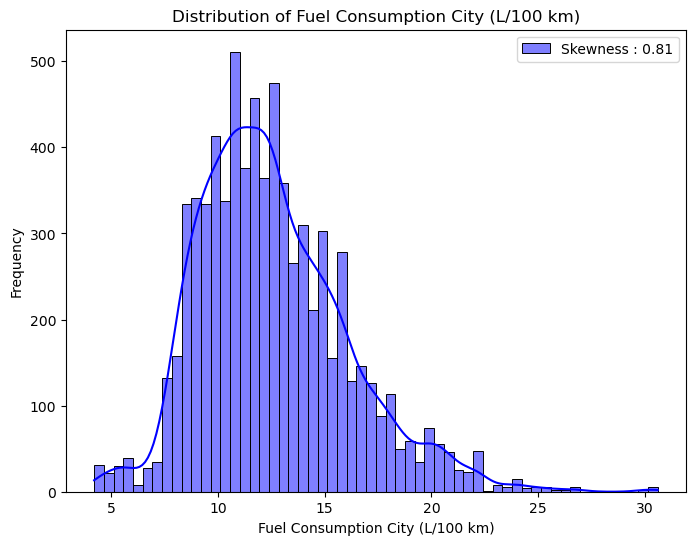

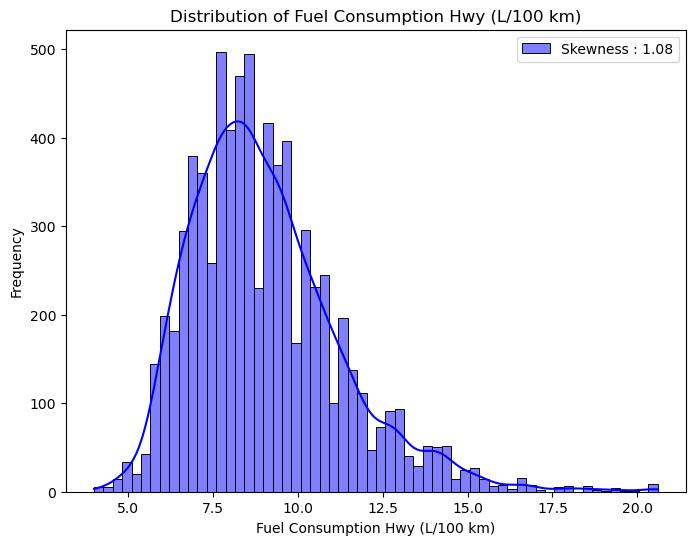

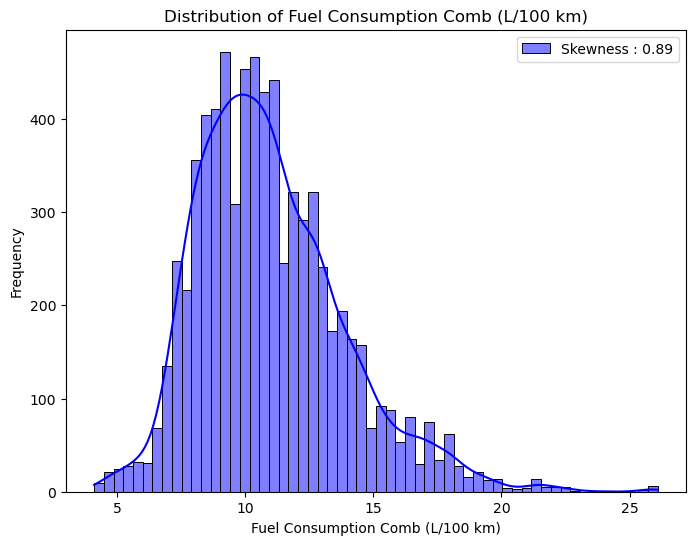

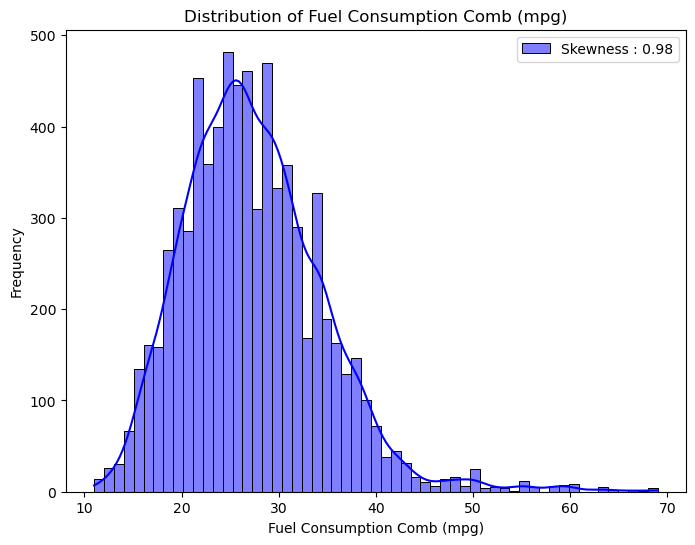

In [20]:
df_filtered = df.drop(columns="CO2 Emissions(g/km)")

numeric_cols = df_filtered.select_dtypes(include=['number']).columns

for col in numeric_cols:
    
    plt.figure(figsize=(8, 6))  
    g = sns.histplot(df_filtered[col], color="b", kde=True, label=f"Skewness : {df_filtered[col].skew():.2f}")
    
    plt.legend(loc="best")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [21]:
df.corr(numeric_only=True)

Engine Size(L)  Cylinders  \
Engine Size(L)                          1.000000   0.927653   
Cylinders                               0.927653   1.000000   
Fuel Consumption City (L/100 km)        0.831379   0.800702   
Fuel Consumption Hwy (L/100 km)         0.761526   0.715252   
Fuel Consumption Comb (L/100 km)        0.817060   0.780534   
Fuel Consumption Comb (mpg)            -0.757854  -0.719321   
CO2 Emissions(g/km)                     0.851145   0.832644   

                                  Fuel Consumption City (L/100 km)  \
Engine Size(L)                                            0.831379   
Cylinders                                                 0.800702   
Fuel Consumption City (L/100 km)                          1.000000   
Fuel Consumption Hwy (L/100 km)                           0.948180   
Fuel Consumption Comb (L/100 km)                          0.993810   
Fuel Consumption Comb (mpg)                              -0.927059   
CO2 Emissions(g/km)                                       0.919592   

                                  Fuel Consumption Hwy (L/100 km)  \
Engine Size(L)                                           0.761526   
Cylinders                                                0.715252   
Fuel Consumption City (L/100 km)                         0.948180   
Fuel Consumption Hwy (L/100 km)                          1.000000   
Fuel Consumption Comb (L/100 km)                         0.977299   
Fuel Consumption Comb (mpg)                             -0.890638   
CO2 Emissions(g/km)                                      0.883536   

                                  Fuel Consumption Comb (L/100 km)  \
Engine Size(L)                                            0.817060   
Cylinders                                                 0.780534   
Fuel Consumption City (L/100 km)                          0.993810   
Fuel Consumption Hwy (L/100 km)                           0.977299   
Fuel Consumption Comb (L/100 km)                          1.000000   
Fuel Consumption Comb (mpg)                              -0.925576   
CO2 Emissions(g/km)                                       0.918052   

                                  Fuel Consumption Comb (mpg)  \
Engine Size(L)                                      -0.757854   
Cylinders                                           -0.719321   
Fuel Consumption City (L/100 km)                    -0.927059   
Fuel Consumption Hwy (L/100 km)                     -0.890638   
Fuel Consumption Comb (L/100 km)                    -0.925576   
Fuel Consumption Comb (mpg)                          1.000000   
CO2 Emissions(g/km)                                 -0.907426   

                                  CO2 Emissions(g/km)  
Engine Size(L)                               0.851145  
Cylinders                                    0.832644  
Fuel Consumption City (L/100 km)             0.919592  
Fuel Consumption Hwy (L/100 km)              0.883536  
Fuel Consumption Comb (L/100 km)             0.918052  
Fuel Consumption Comb (mpg)                 -0.907426  
CO2 Emissions(g/km)                          1.000000

In [22]:
!pip install summarytools

In [23]:
from summarytools import dfSummary
dfSummary(df)

In [24]:
!pip install ydata-profiling
    

In [25]:
from ydata_profiling import ProfileReport

In [26]:
pr_df = ProfileReport(df)
pr_df

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Simple Linear Regression

In [253]:
df = df[["Engine Size(L)","CO2 Emissions(g/km)"]]
df.head()

Engine Size(L)  CO2 Emissions(g/km)
0             2.0                  196
1             2.4                  221
2             1.5                  136
3             3.5                  255
4             3.5                  244

In [28]:
df.shape

(7385, 2)

<Axes: xlabel='Engine Size(L)', ylabel='CO2 Emissions(g/km)'>

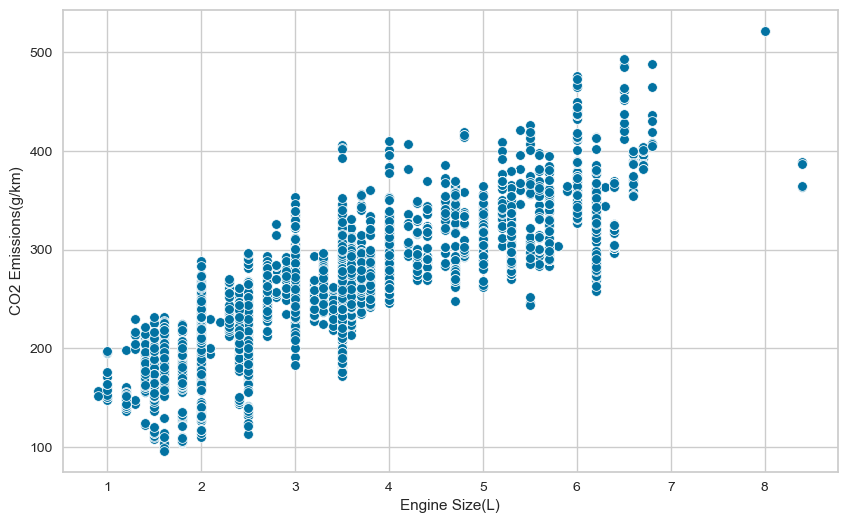

In [254]:
sns.scatterplot(x="Engine Size(L)", y = "CO2 Emissions(g/km)", data=df)

In [30]:
corr= df["CO2 Emissions(g/km)"].corr(df["Engine Size(L)"])
corr

0.8511446437900009

## Coefficant of determination (R2)

In [255]:
R2_score = corr**2 # R2 scoru ile "Engine Size(L)" bu feature la targetin sadece 72% aciklaya biliyoruz.
R2_score

0.7244472046524075

''

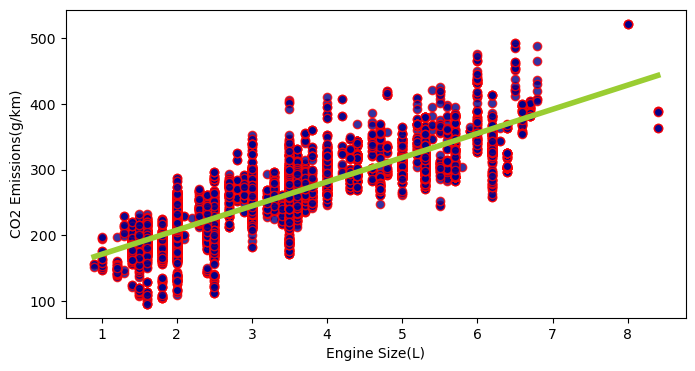

In [32]:
# Least square Error LSE ile Line of Best fit seçimi

sns.regplot( x ="Engine Size(L)" ,
            y= "CO2 Emissions(g/km)",
            data=df, 
            ci=None,
            line_kws={"color": "yellowgreen", "lw": 4},
  scatter_kws={"color": "darkblue", "edgecolor": "red"})
;

In [256]:
X = df["Engine Size(L)"]    # features  # DataFrame olarak kalacak şekilde çift köşeli parantez kullanıyoruz
y = df["CO2 Emissions(g/km)"]   # target variable
print(X,y)

0       2.0
1       2.4
2       1.5
3       3.5
4       3.5
       ... 
7380    2.0
7381    2.0
7382    2.0
7383    2.0
7384    2.0
Name: Engine Size(L), Length: 7385, dtype: float64 0       196
1       221
2       136
3       255
4       244
       ... 
7380    219
7381    232
7382    240
7383    232
7384    248
Name: CO2 Emissions(g/km), Length: 7385, dtype: int64


y_pred = b1X + b0

b1 =  x'in katsayısı

b0 = X sıfır iken y nin aldığı değer

In [257]:
np.polyfit(X, y, deg=1) 

array([ 36.77731519, 134.36589272])

In [35]:
slope, intercept = np.polyfit(X, y, deg=1)

In [36]:
print("slope       :", slope)
print("intercept   :", intercept)

slope       : 36.77731518641939
intercept   : 134.3658927234949


In [37]:
b1, b0 = np.polyfit(X, y, deg = 1)

In [38]:
print("b1 :", b1)
print("b0 :", b0)

b1 : 36.77731518641939
b0 : 134.3658927234949


In [39]:
# y_pred i formulize edelim
y_pred = b1*X + b0

In [40]:
y_pred

0       207.920523
1       222.631449
2       189.531866
3       263.086496
4       263.086496
           ...    
7380    207.920523
7381    207.920523
7382    207.920523
7383    207.920523
7384    207.920523
Name: Engine Size(L), Length: 7385, dtype: float64

In [41]:
values = {"actual": y, "predicted": y_pred, "residual": y - y_pred, "LSE": (y - y_pred)**2}
df_2 = pd.DataFrame(values)
df_2

actual   predicted   residual          LSE
0        196  207.920523 -11.920523   142.098871
1        221  222.631449  -1.631449     2.661626
2        136  189.531866 -53.531866  2865.660624
3        255  263.086496  -8.086496    65.391416
4        244  263.086496 -19.086496   364.294325
...      ...         ...        ...          ...
7380     219  207.920523  11.079477   122.754808
7381     232  207.920523  24.079477   579.821208
7382     240  207.920523  32.079477  1029.092838
7383     232  207.920523  24.079477   579.821208
7384     248  207.920523  40.079477  1606.364469

[7385 rows x 4 columns]

In [42]:
df_2.residual.sum().round()

0.0

In [43]:
df_2.LSE

0        142.098871
1          2.661626
2       2865.660624
3         65.391416
4        364.294325
           ...     
7380     122.754808
7381     579.821208
7382    1029.092838
7383     579.821208
7384    1606.364469
Name: LSE, Length: 7385, dtype: float64

In [44]:
df_2.LSE.sum()

6966208.685372684

# Prediction with simple linear regression

In [45]:
potential_eng_size= np.linspace(0,10,7385)   
potential_eng_size

array([0.00000000e+00, 1.35427952e-03, 2.70855905e-03, ...,
       9.99729144e+00, 9.99864572e+00, 1.00000000e+01])

In [46]:
predicted_co2 = b1*potential_eng_size + b0
predicted_co2

array([134.36589272, 134.41569949, 134.46550625, ..., 502.03943106,
       502.08923782, 502.13904459])

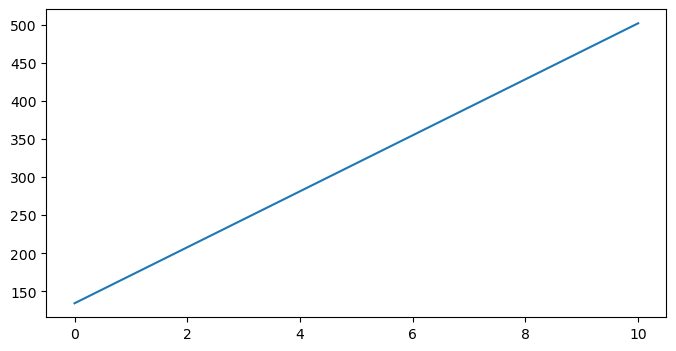

In [47]:
plt.plot(potential_eng_size,predicted_co2)

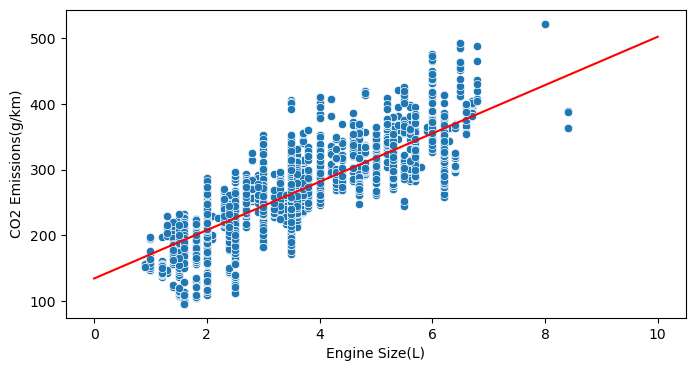

In [48]:
plt.plot(potential_eng_size, predicted_co2 , color ="r")
sns.scatterplot(x="Engine Size(L)", y="CO2 Emissions(g/km)", data=df);

# How can we improve our predictions? 

y = b1 * x + b0  => simple linear

y = a1 * x**3 + a2 * x**2 + a3*x + a0 => 3 degree polinominal
Model Complexity

In [49]:
a = np.polyfit(X, y, deg=3)
a

array([ 0.5532652 , -8.69737899, 76.04439217, 84.89105185])

In [50]:
a1 = np.polyfit(X, y, deg=3)[0]   # x^3 teriminin katsayısı
a2 = np.polyfit(X, y, deg=3)[1]   # x^2 teriminin katsayısı
a3 = np.polyfit(X, y, deg=3)[2]   # x teriminin katsayısı
a0 = np.polyfit(X, y, deg=3)[3]   # sabit terim

In [51]:
# a1 = coefficients[0]
# a2 = coefficients[1]
# a3 = coefficients[2]
# a0 = coefficients[3]

In [52]:

predicted_co2_poly = a1*potential_eng_size**3 + a2*potential_eng_size**2+a3*potential_eng_size + a0
predicted_co2_poly

array([ 84.89105185,  84.99402126,  85.09695878, ..., 528.6779456 ,
       528.77009657, 528.86227652])

In [53]:
print( a)

[ 0.5532652  -8.69737899 76.04439217 84.89105185]


In [54]:
print(a1)

0.5532652018909368


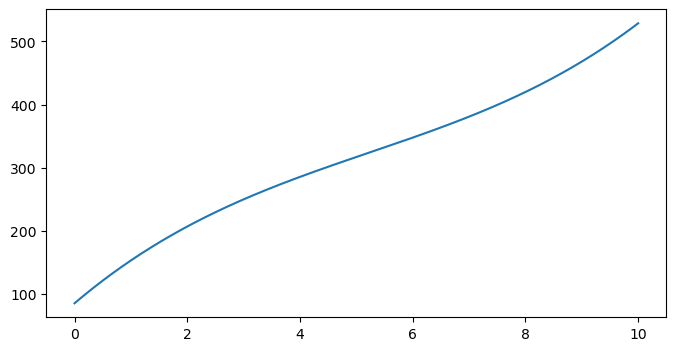

In [55]:
plt.plot(potential_eng_size, predicted_co2_poly)

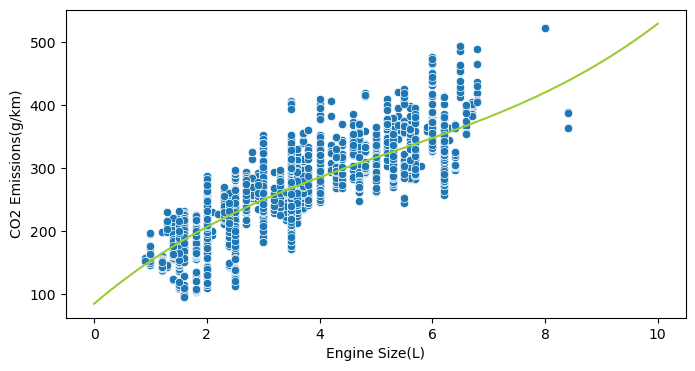

In [56]:
plt.plot(potential_eng_size, predicted_co2_poly  , color = "yellowgreen")
sns.scatterplot(x="Engine Size(L)", y="CO2 Emissions(g/km)", data=df);

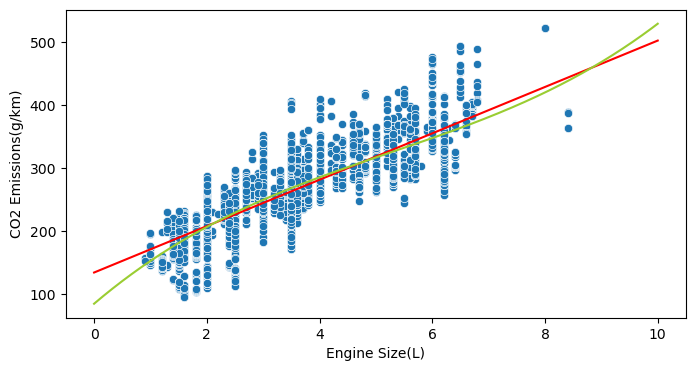

In [57]:
plt.plot(potential_eng_size, predicted_co2 , color ="r")
plt.plot(potential_eng_size, predicted_co2_poly , color = "yellowgreen")
sns.scatterplot(x="Engine Size(L)", y="CO2 Emissions(g/km)", data=df);
plt.show()

In [58]:
y_pred_poly = a1* potential_eng_size** 3 + a2 * potential_eng_size ** 2 + a3 * potential_eng_size + a0

In [59]:
values1 = {"actual": y, "predicted": y_pred, "residual": y - y_pred, "LSE": (y - y_pred)**2}
df_2= pd.DataFrame(values1)
df_2

actual   predicted   residual          LSE
0        196  207.920523 -11.920523   142.098871
1        221  222.631449  -1.631449     2.661626
2        136  189.531866 -53.531866  2865.660624
3        255  263.086496  -8.086496    65.391416
4        244  263.086496 -19.086496   364.294325
...      ...         ...        ...          ...
7380     219  207.920523  11.079477   122.754808
7381     232  207.920523  24.079477   579.821208
7382     240  207.920523  32.079477  1029.092838
7383     232  207.920523  24.079477   579.821208
7384     248  207.920523  40.079477  1606.364469

[7385 rows x 4 columns]

In [60]:
values2 = {"actual": y, "predicted": y_pred_poly, "residual": y - y_pred_poly, "LSE": (y - y_pred_poly)**2}
df_3 = pd.DataFrame(values2)
df_3

actual   predicted    residual           LSE
0        196   84.891052  111.108948  12345.198360
1        221   84.994021  136.005979  18497.626253
2        136   85.096959   50.903041   2591.119606
3        255   85.199864  169.800136  28832.086047
4        244   85.302738  158.697262  25184.820915
...      ...         ...         ...           ...
7380     219  528.493731 -309.493731  95786.369235
7381     232  528.585824 -296.585824  87963.150750
7382     240  528.677946 -288.677946  83334.956273
7383     232  528.770097 -296.770097  88072.490220
7384     248  528.862277 -280.862277  78883.618373

[7385 rows x 4 columns]

In [61]:
LSE_linear = df_2.LSE.sum()
LSE_poly = df_3.LSE.sum()

In [62]:
print(f"LSE Linear:", {LSE_linear})
print(f"LSE Polynomial:", {LSE_poly})

LSE Linear: {6966208.685372684}
LSE Polynomial: {151261258.89676154}


In [63]:
t1,t2,t3,t4,t0= np.polyfit(X, y, deg=4)
print(t1,t2,t3,t4,t0)

0.05399126251731948 -0.3649285519810398 -3.2769758612804947 63.09022399157125 95.33320742286864


In [64]:
predicted_co2_poly4 = t1*potential_eng_size**4 + t2*potential_eng_size**3 + t3*potential_eng_size**2 + t4*potential_eng_size** +t0
predicted_co2_poly4

array([ 0.00000000e+00, -6.01111928e-06, -2.40481007e-05, ...,
        1.32420069e+97,  1.34141152e+97,  1.35884366e+97])

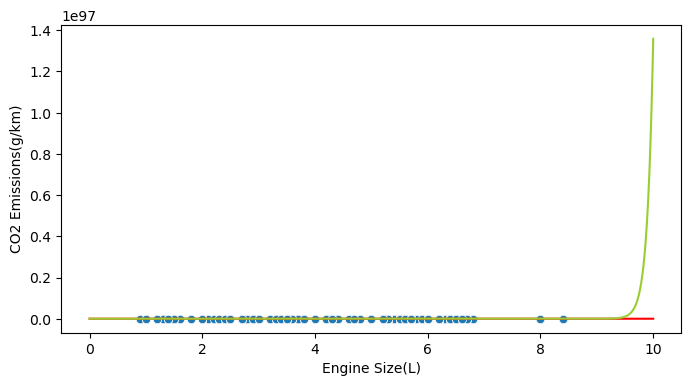

In [65]:

plt.plot(potential_eng_size, predicted_co2, color = "red")
plt.plot(potential_eng_size, predicted_co2_poly4, color = "yellowgreen")
sns.scatterplot(x="Engine Size(L)", y="CO2 Emissions(g/km)", data=df);
plt.show()

In [66]:
y_pred_poly4 = t1* potential_eng_size** 4 + t2 * potential_eng_size ** 3 + t3 * potential_eng_size**2 +t2 * potential_eng_size**2 + t0

In [67]:
values3 = {"actual": y, "predicted": y_pred_poly4, "residual": y - y_pred_poly4, "LSE": (y - y_pred_poly4)**2}
df_4= pd.DataFrame(values3)
df_4

actual  predicted    residual            LSE
0        196  95.333207  100.666793   10133.803128
1        221  95.333201  125.666799   15792.144436
2        136  95.333181   40.666819    1653.790192
3        255  95.333147  159.666853   25493.503857
4        244  95.333100  148.666900   22101.847009
...      ...        ...         ...            ...
7380     219 -94.054916  313.054916   98003.380333
7381     232 -94.009575  326.009575  106282.242948
7382     240 -93.964169  333.964169  111532.066037
7383     232 -93.918697  325.918697  106222.997311
7384     248 -93.873161  341.873161  116877.258015

[7385 rows x 4 columns]

In [68]:
LSE_linear = df_2.LSE.sum()
LSE_poly = df_3.LSE.sum()

In [69]:
print(f"LSE Linear:", {LSE_linear})
print(f"LSE Polynomial:", {LSE_poly})

LSE Linear: {6966208.685372684}
LSE Polynomial: {151261258.89676154}


## Train -Test Split

In [258]:
from sklearn.model_selection import train_test_split


In [83]:
X_train_slr, X_test_slr, y_train_slr, y_test_slr = train_test_split(X,y, test_size=0.2, random_state=42)

In [259]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\nY Test features shape : {}".format
      (X_train_slr.shape, y_train_slr.shape, X_test_slr.shape, y_test_slr.shape))


X Train features shape: (5908, 1)
y Train features shape: (5908,)
X Test features shape : (1477, 1)
Y Test features shape : (1477,)


# Model Fitting and Compare Actual and Predicted Labels

In [85]:
X = df[["Engine Size(L)"]]     # features  # DataFrame olarak kalacak şekilde çift köşeli parantez kullanıyoruz
y = df["CO2 Emissions(g/km)"]   # target variable
print(X,y)

      Engine Size(L)
0                2.0
1                2.4
2                1.5
3                3.5
4                3.5
...              ...
7380             2.0
7381             2.0
7382             2.0
7383             2.0
7384             2.0

[7385 rows x 1 columns] 0       196
1       221
2       136
3       255
4       244
       ... 
7380    219
7381    232
7382    240
7383    232
7384    248
Name: CO2 Emissions(g/km), Length: 7385, dtype: int64


In [86]:
from sklearn.linear_model import LinearRegression

In [87]:
slm= LinearRegression()
slm

LinearRegression()

In [88]:
slm.fit(X_train_slr, y_train_slr)

LinearRegression()

In [89]:
y_pred_slr = slm.predict(X_test_slr)
y_pred_slr

array([244.89311066, 296.15016006, 362.05208072, ..., 186.31362563,
       263.19919973, 208.28093252])

In [90]:
slm.coef_      # modelin katsayılarını verir

array([36.61217814])

In [91]:
slm.intercept_       # modeldeki sabit sayıyı verir

135.05657623459336

**CO2 Emissions(g/km)=36.61217814×Engine Size(L)+intercept

In [92]:
my_dict = {"Actual": y_test_slr, "pred": y_pred_slr, "residual":y_test_slr - y_pred_slr}

In [93]:
comparing =pd.DataFrame(my_dict)
comparing

Actual        pred   residual
7261     253  244.893111   8.106889
4489     344  296.150160  47.849840
1539     322  362.052081 -40.052081
3532     297  329.101120 -32.101120
6418     308  281.505289  26.494711
...      ...         ...        ...
7185     221  208.280933  12.719067
1740     260  208.280933  51.719067
4609     184  186.313626  -2.313626
1844     235  263.199200 -28.199200
5154     193  208.280933 -15.280933

[1477 rows x 3 columns]

In [94]:
df.iloc[7261]

Engine Size(L)           3.0
CO2 Emissions(g/km)    253.0
Name: 7261, dtype: float64

In [95]:
df.iloc[6418]

Engine Size(L)           4.0
CO2 Emissions(g/km)    308.0
Name: 6418, dtype: float64

In [96]:
comparing.residual.sum().round()

-1247.0

In [97]:
result_sample=comparing.head(25)

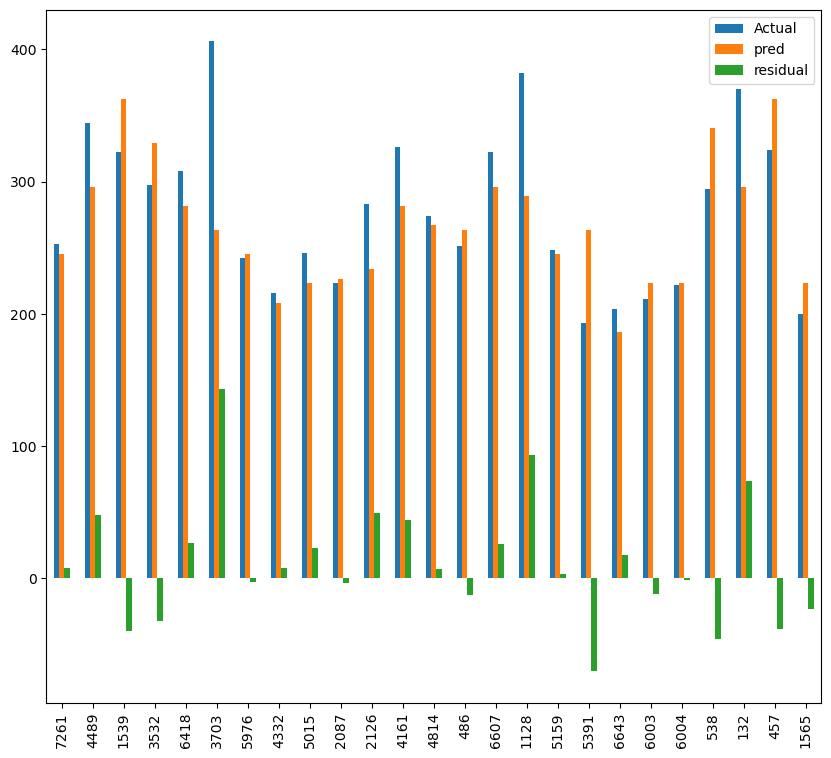

In [98]:
result_sample.plot(kind= "bar", figsize = (10,9))
plt.show()

## Error Matrics

In [99]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [100]:
R2_score = r2_score(y_test_slr, y_pred_slr)
R2_score

0.7238115822302345

In [101]:
rmse = np.sqrt(mean_squared_error(y_test_slr, y_pred_slr))
rmse

30.821830791462336

In [102]:

def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [103]:
eval_metric(y_test_slr, y_pred_slr)

Model testing performance: 
---------------------------
R2_score 	: 0.7238115822302345
MAE 		: 22.927177134342056
MSE 		: 949.9852533375358
RMSE 		: 30.821830791462336


In [104]:
# X_train degerlerini prediction yapacağız
y_train_slr_pred = slm.predict(X_train_slr)

In [105]:
eval_metric(y_train_slr, y_train_slr_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.7245276280573065
MAE 		: 23.374986568616432
MSE 		: 941.7163581594913
RMSE 		: 30.687397383282462


In [106]:
residuals = y_test_slr - y_pred_slr

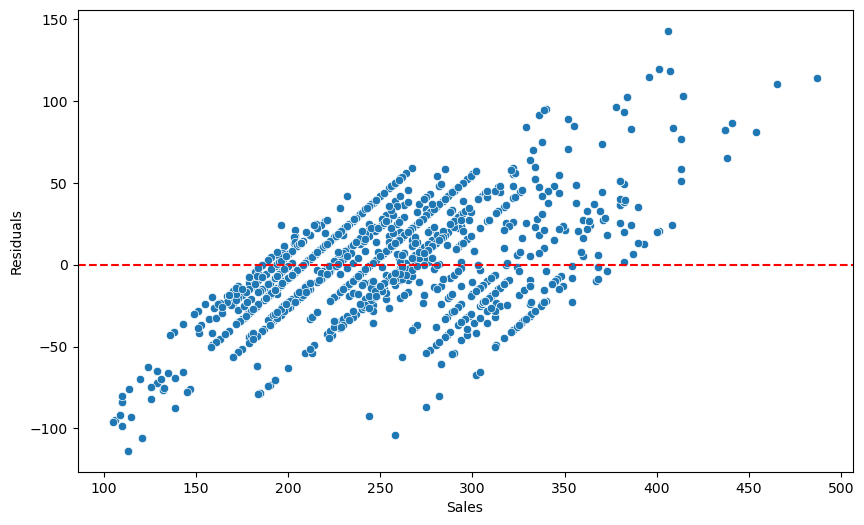

In [107]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x= y_test_slr, y=residuals)
plt.xlabel("Sales")
plt.ylabel("Residuals")
plt.axhline(y=0, color = "r", linestyle ="--" )
plt.show()

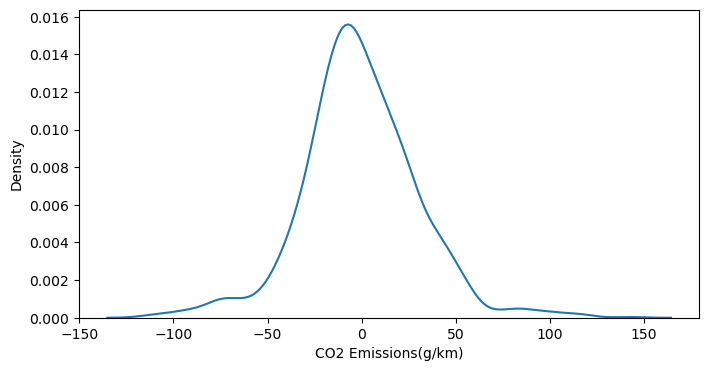

In [108]:
sns.kdeplot(residuals);

((array([-3.30838184, -3.05140859, -2.90851776, ...,  2.90851776,
          3.05140859,  3.30838184]),
  array([-113.58702159, -113.58702159, -105.58702159, ...,  118.17227557,
          119.4947112 ,  142.80080027])),
 (30.4877483473726, -0.8441963542405128, 0.9875804109940747))

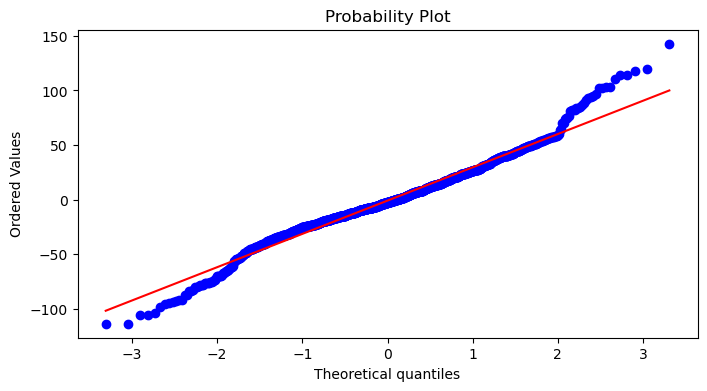

In [109]:
stats.probplot(residuals, dist = "norm", plot = plt)

# Multileaner Regression

In [9]:
df = pd.read_csv("co2.csv")
df

Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                               9.9   
1              M6         Z                              11.2   
2             AV7         Z                               6.0   
3             AS6         Z                              12.7   
4             AS6         Z                              12.1   
...           ...       ...                               ...   
7380          AS8         Z                              10.7   
7381          AS8         Z                              11.2   
7382          AS8         Z                              11.7   
7383          AS8         Z                              11.2   
7384          AS8         Z                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                                 6.7                               8.5   
1                                 7.7                               9.6   
2                                 5.8                               5.9   
3                                 9.1                              11.1   
4                                 8.7                              10.6   
...                               ...                               ...   
7380                              7.7                               9.4   
7381                              8.3                               9.9   
7382                              8.6                              10.3   
7383                              8.3                               9.9   
7384                              8.7                              10.7   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                              33                  196  
1                              29                  221  
2                              48                  136  
3                              25                  255  
4                              27                  244  
...                           ...                  ...  
7380                           30                  219  
7381                           29                  232  
7382                           27                  240  
7383                           29                  232  
7384                           26                  248  

[7385 rows x 12 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [11]:
df.shape

(7385, 12)

In [12]:
X = df[["Engine Size(L)",
        "Fuel Consumption City (L/100 km)",
        "Fuel Consumption Hwy (L/100 km)",
        "Fuel Consumption Comb (L/100 km)"
       ]]   
y = df["CO2 Emissions(g/km)"]                
print(X,y)

      Engine Size(L)  Fuel Consumption City (L/100 km)  \
0                2.0                               9.9   
1                2.4                              11.2   
2                1.5                               6.0   
3                3.5                              12.7   
4                3.5                              12.1   
...              ...                               ...   
7380             2.0                              10.7   
7381             2.0                              11.2   
7382             2.0                              11.7   
7383             2.0                              11.2   
7384             2.0                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  
0                                 6.7                               8.5  
1                                 7.7                               9.6  
2                                 5.8                               5.9  
3      

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [15]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\nY Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))


X Train features shape: (5169, 4)
y Train features shape: (5169,)
X Test features shape : (2216, 4)
Y Test features shape : (2216,)


In [16]:
X_test

Engine Size(L)  Fuel Consumption City (L/100 km)  \
7261             3.0                              12.4   
4489             4.4                              17.3   
1539             6.2                              16.1   
3532             5.3                              14.6   
6418             4.0                              14.3   
...              ...                               ...   
5123             4.0                              15.5   
5359             2.5                               9.3   
7294             2.0                               9.7   
2569             2.0                              10.9   
1086             4.7                              17.4   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  
7261                              9.0                              10.9  
4489                             11.6                              14.7  
1539                             11.4                              14.0  
3532                             10.3                              12.7  
6418                             11.9                              13.2  
...                               ...                               ...  
5123                             10.6                              13.3  
5359                              7.0                               8.3  
7294                              7.2                               8.6  
2569                              7.9                               9.6  
1086                             11.3                              14.7  

[2216 rows x 4 columns]

In [17]:
y_test

7261    253
4489    344
1539    322
3532    297
6418    308
       ... 
5123    313
5359    193
7294    200
2569    224
1086    338
Name: CO2 Emissions(g/km), Length: 2216, dtype: int64

In [18]:
X_train

Engine Size(L)  Fuel Consumption City (L/100 km)  \
6130             2.2                               8.9   
7188             3.0                              12.7   
6304             3.0                              10.6   
6017             3.6                              12.8   
2348             4.4                              15.7   
...              ...                               ...   
5191             2.0                              10.3   
5226             3.5                              10.6   
5390             3.5                              11.7   
860              2.5                               9.5   
7270             4.0                              13.4   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  
6130                              7.9                               8.4  
7188                             10.1                              11.6  
6304                              8.0                               9.4  
6017                             10.4                              11.8  
2348                             11.4                              13.8  
...                               ...                               ...  
5191                              7.4                               9.0  
5226                              7.3                               9.1  
5390                              8.8                              10.4  
860                               7.4                               8.6  
7270                             10.1                              11.9  

[5169 rows x 4 columns]

# Model Fitting and Compare Actual and Predicted Labels

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()

In [22]:
lm.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = lm.predict(X_test)
y_pred

array([247.49314135, 318.24250605, 330.531149  , ..., 203.35582624,
       217.08713403, 322.16751909])

In [25]:
lm.coef_  

array([12.63210709,  2.68240309,  0.44286467, 10.20241882])

In [26]:
lm.feature_names_in_ 

array(['Engine Size(L)', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)',
       'Fuel Consumption Comb (L/100 km)'], dtype=object)

In [27]:
lm.intercept_ 

61.14287465659669

In [28]:
dict = {"Actual": y_test, "pred": y_pred, "residual":y_test - y_pred}

In [29]:
comparing_lm=pd.DataFrame(dict)
comparing_lm

Actual        pred   residual
7261     253  247.493141   5.506859
4489     344  318.242506  25.757494
1539     322  330.531149  -8.531149
3532     297  301.388352  -4.388352
6418     308  289.971685  18.028315
...      ...         ...        ...
5123     313  293.635087  19.364913
5359     193  205.449620 -12.449620
7294     200  203.355826  -3.355826
2569     224  217.087134   6.912866
1086     338  322.167519  15.832481

[2216 rows x 3 columns]

In [30]:
result_sample_lm = comparing_lm.head(25)
result_sample_lm

Actual        pred   residual
7261     253  247.493141   5.506859
4489     344  318.242506  25.757494
1539     322  330.531149  -8.531149
3532     297  301.388352  -4.388352
6418     308  289.971685  18.028315
3703     406  342.960412  63.039588
5976     242  240.829298   1.170702
4332     216  212.685207   3.314793
5015     246  233.551606  12.448394
2087     223  224.824529  -1.824529
2126     283  260.883166  22.116834
4161     326  299.939595  26.060405
4814     274  266.182463   7.817537
486      251  255.152918  -4.152918
6607     322  305.307486  16.692514
1128     382  343.728657  38.271343
5159     248  243.091214   4.908786
5391     193  215.527140 -22.527140
6643     204  196.257802   7.742198
6003     211  214.411605  -3.411605
6004     222  220.807208   1.192792
538      294  307.226901 -13.226901
132      370  335.601831  34.398169
457      324  332.087871  -8.087871
1565     200  210.369013 -10.369013

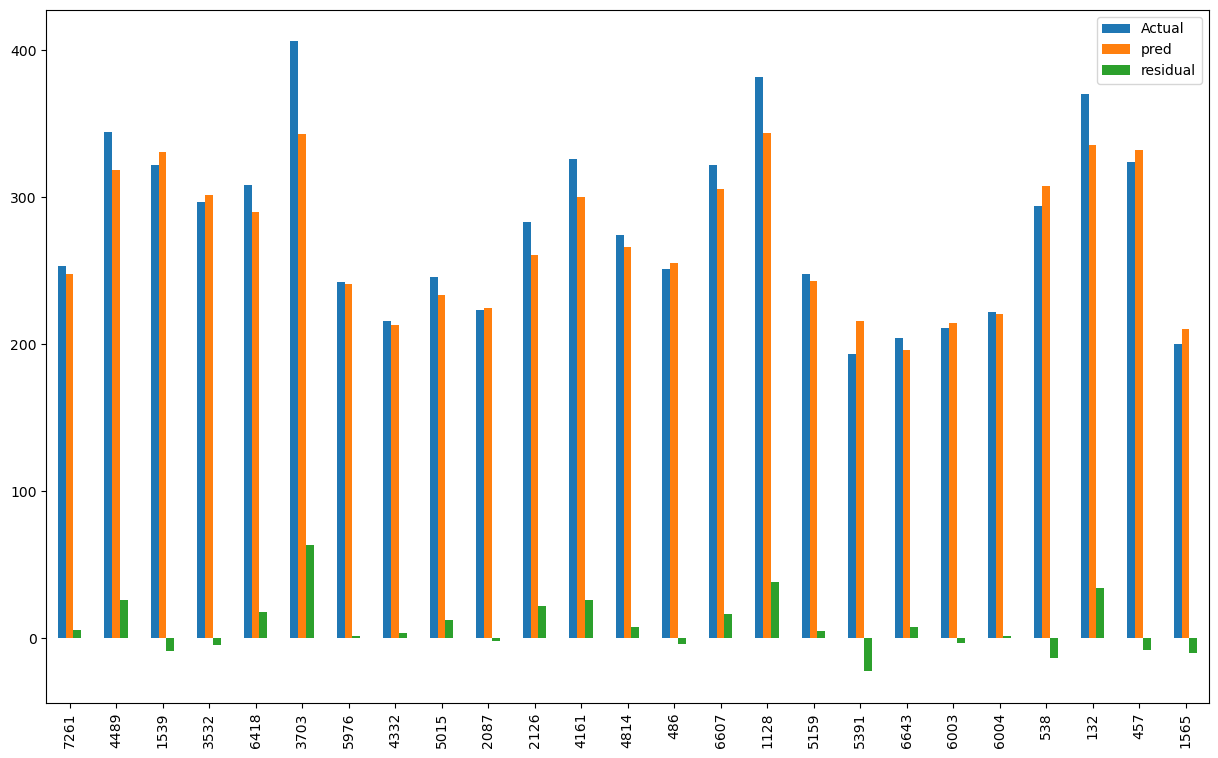

In [31]:
result_sample_lm.plot(kind= "bar", figsize = (15,9))
plt.show()

# Error Metrics

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [33]:
R2_score = r2_score(y_test, y_pred)
R2_score

0.8696343237869403

In [34]:
mae = mean_absolute_error(y_test, y_pred)
mae

13.480594300830528

In [35]:
# Mean squared error hesabı
mse = mean_squared_error(y_test, y_pred)
mse

440.3368664459096

In [36]:
# Root Mean Squared Error - RMSE  hesabı

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

20.98420516593158

In [39]:

def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [40]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.8696343237869403
MAE 		: 13.480594300830528
MSE 		: 440.3368664459096
RMSE 		: 20.98420516593158


# Adjusted R2 Score (düzeltilmiş R2 degeri)

In [41]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)    #R2 scor
    n = df.shape[0]      # number of observations gözlem
    p =df.shape[1]-1    # number of indep. variable = feature
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)   
    return adj_r2

In [42]:
adj_r2(y_test, y_pred, df)

0.8694398273216828

In [43]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]   # number of observations
    p = 100 # number of independent variables ..feature sayısıı 100 aldık
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [44]:
adj_r2(y_test, y_pred, df)

0.8678445698576012

# Evaluation Model

In [57]:
# X_train degerlerini prediction yapacağız
y_train_pred = lm.predict(X_train)

In [58]:
eval_metric(y_train, y_train_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.8753401034629793
MAE 		: 13.398753941235901
MSE 		: 429.0443041489846
RMSE 		: 20.713384661831213


In [59]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.8696343237869403
MAE 		: 13.480594300830528
MSE 		: 440.3368664459096
RMSE 		: 20.98420516593158


In [60]:
residuals = y_test - y_pred
residuals.sum()

-994.7439179021344

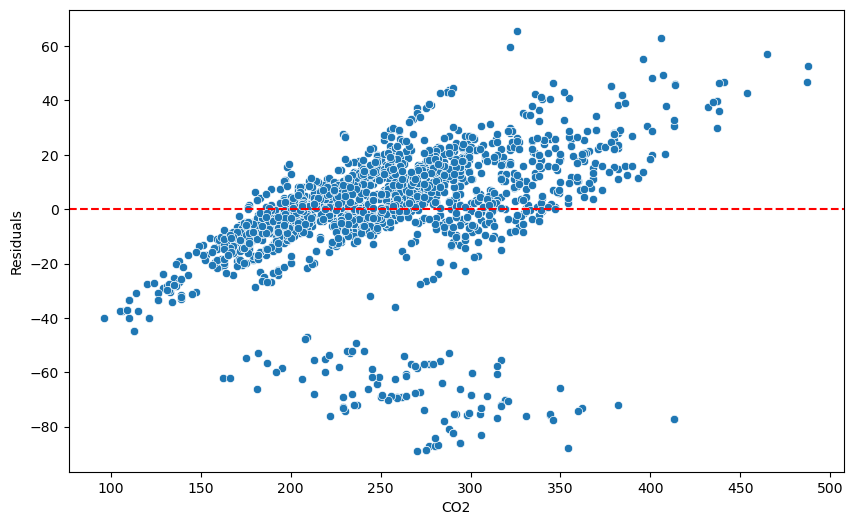

In [61]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x= y_test, y=residuals)
plt.xlabel("CO2")
plt.ylabel("Residuals")
plt.axhline(y=0, color = "r", linestyle ="--" )
plt.show()

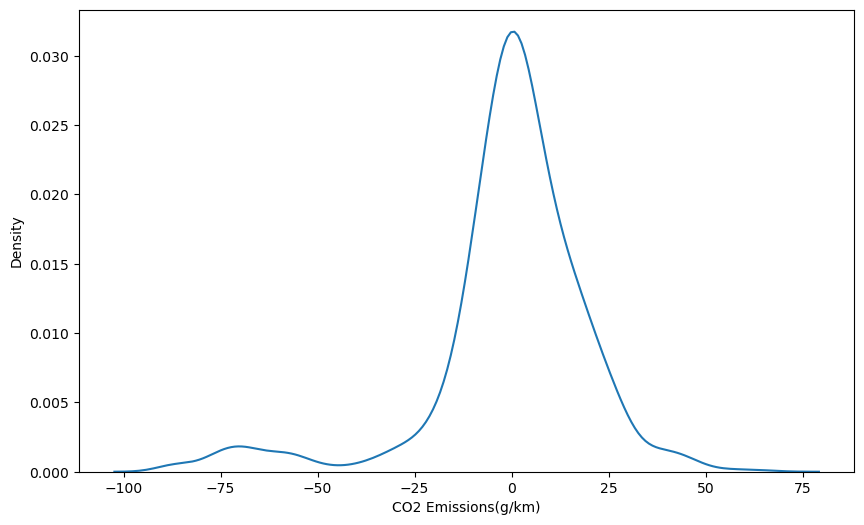

In [62]:
sns.kdeplot(residuals);

((array([-3.42031516, -3.17117209, -3.03309047, ...,  3.03309047,
          3.17117209,  3.42031516]),
  array([-88.88802643, -88.78214777, -88.78214777, ...,  59.62244958,
          63.03958774,  65.66763124])),
 (19.43567545518012, -0.44889165970313344, 0.925140512870285))

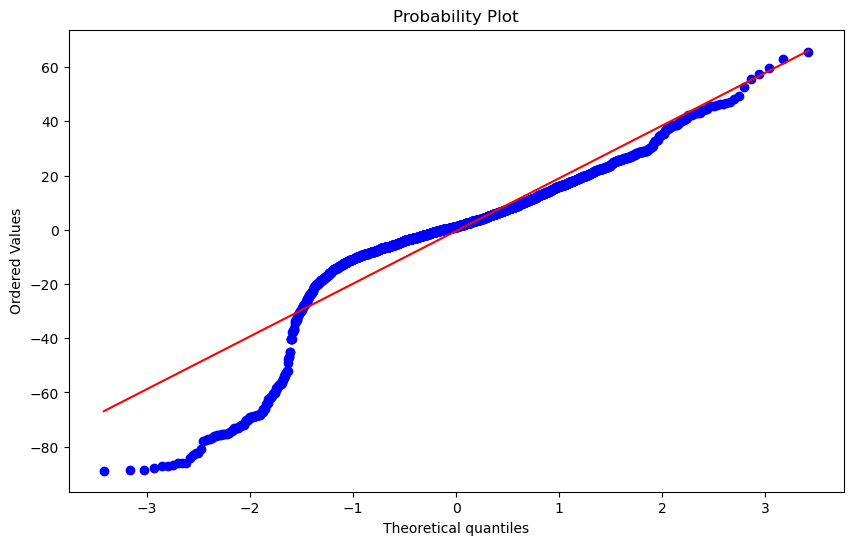

In [63]:
stats.probplot(residuals, dist = "norm", plot = plt)

In [86]:
from scipy.stats import skew

In [88]:
skew(residuals)

-1.5482781348749255

In [300]:
pip install yellowbrick 

Note: you may need to restart the kernel to use updated packages.


In [65]:
from yellowbrick.regressor import ResidualsPlot

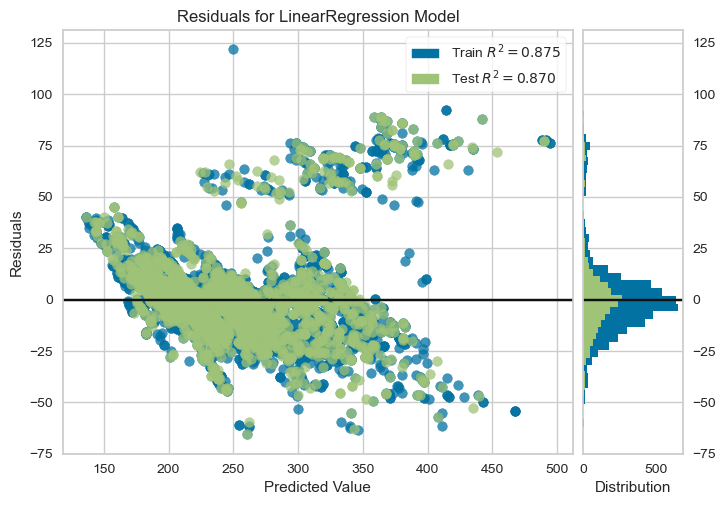

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [66]:
# Instantiate the linear model and visualizer
lm = LinearRegression()
visualizer = ResidualsPlot(lm)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

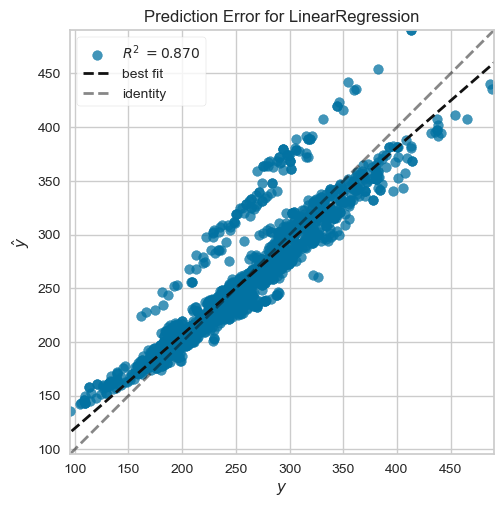

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [67]:
from yellowbrick.regressor import PredictionError
lm = LinearRegression()
visualizer = PredictionError(lm)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

# Polynomial Regression 

In [89]:
from sklearn.preprocessing import PolynomialFeatures

In [90]:
print(X,y)

      Engine Size(L)  Fuel Consumption City (L/100 km)  \
0                2.0                               9.9   
1                2.4                              11.2   
2                1.5                               6.0   
3                3.5                              12.7   
4                3.5                              12.1   
...              ...                               ...   
7380             2.0                              10.7   
7381             2.0                              11.2   
7382             2.0                              11.7   
7383             2.0                              11.2   
7384             2.0                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  
0                                 6.7                               8.5  
1                                 7.7                               9.6  
2                                 5.8                               5.9  
3      

In [179]:
poly_conv = PolynomialFeatures(degree=4, include_bias=False)

In [180]:
poly_conv.fit(X)

PolynomialFeatures(degree=4, include_bias=False)

In [181]:
poly_features = poly_conv.transform(X)  

In [182]:
poly_features.shape 

(7385, 69)

In [183]:
X.shape

(7385, 4)

In [184]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

## Model fitting

In [185]:
from sklearn.linear_model import LinearRegression

In [186]:
model_poly = LinearRegression()

In [187]:
model_poly.fit(X_train, y_train)

LinearRegression()

In [189]:
y_pred = model_poly.predict(X_test)

In [190]:
my_dict = {"Actual":y_test, "pred":y_pred, "residual": y_test - y_pred }
compare = pd.DataFrame(my_dict)
compare.head(20)

Actual        pred   residual
7261     253  256.794138  -3.794138
4489     344  319.325821  24.674179
1539     322  326.543036  -4.543036
3532     297  294.384018   2.615982
6418     308  310.955277  -2.955277
3703     406  338.311240  67.688760
5976     242  245.485945  -3.485945
4332     216  217.899681  -1.899681
5015     246  250.088839  -4.088839
2087     223  230.203698  -7.203698
2126     283  290.715208  -7.715208
4161     326  308.702401  17.297599
4814     274  274.863069  -0.863069
486      251  256.007992  -5.007992
6607     322  314.768019   7.231981
1128     382  399.338452 -17.338452
5159     248  251.768022  -3.768022
5391     193  194.371423  -1.371423
6643     204  199.850302   4.149698
6003     211  211.912713  -0.912713

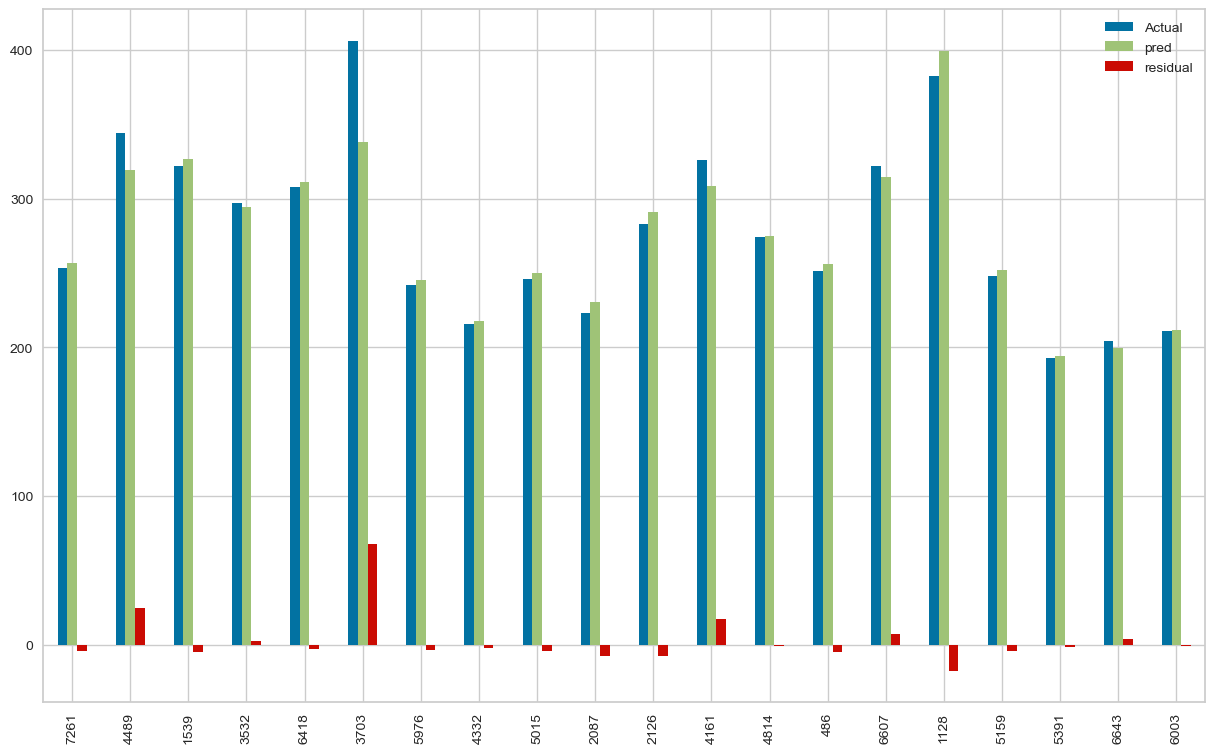

In [191]:
compare.head(20).plot(kind ="bar", figsize =(15,9))
plt.show();

## Polynomial Coefficients - katsayılar

In [192]:
model_poly.coef_

array([-1.36481242e+01, -4.18118283e+02, -5.30438941e+02,  8.26971513e+02,
        2.50777657e+01,  1.93758938e+02,  1.90328578e+02, -3.92495966e+02,
        3.71432277e+02,  7.92919713e+02, -1.43536240e+03,  4.27847108e+02,
       -1.52167982e+03,  1.38932741e+03,  1.11123172e+01,  7.05976100e+01,
        6.62532800e+01, -1.51042531e+02,  3.93755047e+02,  7.05167766e+02,
       -1.56090505e+03,  3.38402631e+02, -1.44105354e+03,  1.56946960e+03,
       -1.06309072e+03, -3.04870170e+03,  6.04179163e+03, -2.78790749e+03,
        1.13245247e+04, -1.13351671e+04, -8.06954432e+02,  5.04998672e+03,
       -1.03841886e+04,  7.00767827e+03,  7.56120613e-01, -2.92344593e+00,
       -1.81377423e+00,  3.01962089e+00, -3.98960614e+01, -7.61362446e+01,
        1.50938655e+02, -3.58683006e+01,  1.42398302e+02, -1.40202972e+02,
       -2.03314354e+02, -4.60218293e+02,  1.07253923e+03, -3.77268640e+02,
        1.66860017e+03, -1.90238016e+03, -1.13605590e+02,  7.08303996e+02,
       -1.52660661e+03,  

# Evaluation on the Test Set

In [193]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [194]:
y_pred = model_poly.predict(X_test)

In [195]:
eval_metric(y_test, y_pred) 

Model testing performance: 
---------------------------
R2_score 	: 0.9356164151581892
MAE 		: 7.43543212043776
MSE 		: 217.46879104484137
RMSE 		: 14.746823083120017


In [196]:
y_train_pred = model_poly.predict(X_train)   

In [197]:
eval_metric(y_train, y_train_pred) 

Model testing performance: 
---------------------------
R2_score 	: 0.9442114196227058
MAE 		: 6.897776991178534
MSE 		: 192.00860350728416
RMSE 		: 13.856716909401165


In [111]:
def poly(d):   # degree derecesi içine ne yazarsam ona göre çözüm oluşturacak
    
    train_rmse_errors = []   # trains rmse değerlerin toplayacak
    test_rmse_errors = []    # test rmse değerlerin toplayacak
    number_of_features = []  # derece arttıkça feature sayısının kaça çıktığnı göreceğiz
    
    for i in range(1, d):  # 1 den kaçıncı dereceye kadar istiyorsak ona göre yazacağız
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False)
        poly_features = polynomial_converter.fit_transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
        
        model = LinearRegression(fit_intercept=True) 
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
        number_of_features.append(poly_features.shape[1])
        
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors, "number of features":number_of_features}, 
                        index=range(1,d))

In [112]:
poly(10)

train_rmse_errors  test_rmse_errors  number of features
1          20.855262         20.665769                   4
2          16.661711         16.560362                  14
3          15.820798         15.626022                  34
4          14.199758         14.116195                  69
5          13.517680         15.302500                 125
6          12.263019         28.128081                 209
7          11.062131        137.438087                 329
8          10.901725        123.172914                 494
9          31.419044        727.206273                 714

KeyboardInterrupt: 

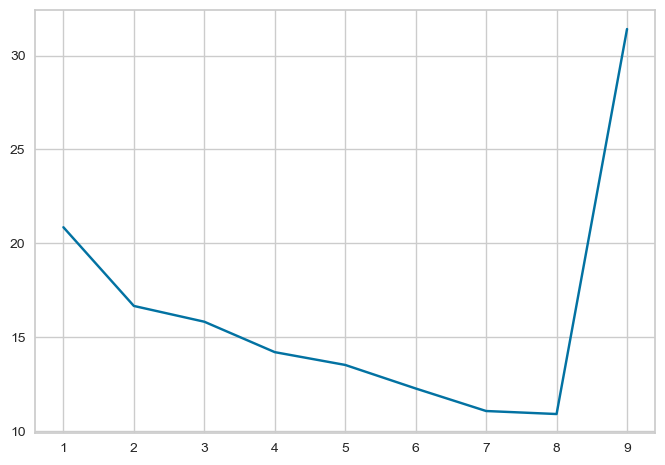

In [113]:
plt.plot(range(1,10), poly(10)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,10), poly(10)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();
plt.show()

In [ ]:

plt.plot(range(1,6), poly(6)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,6), poly(6)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();
plt.show()

## Scaling the Data

In [198]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [199]:
scaler = StandardScaler()

In [200]:
scaler.fit(X_train)

StandardScaler()

In [201]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.71235412, -1.04936647, -0.52119825, ..., -0.5017534 ,
        -0.52788342, -0.54805264],
       [-0.12513485,  0.03277462,  0.47101105, ..., -0.03867926,
        -0.08280189, -0.12470676],
       [-0.12513485, -0.56525072, -0.47609783, ..., -0.43959551,
        -0.4490769 , -0.45682931],
       ...,
       [ 0.2418772 , -0.25199935, -0.11529444, ..., -0.304447  ,
        -0.31839076, -0.33134793],
       [-0.49214689, -0.87850208, -0.74670036, ..., -0.51931709,
        -0.5269014 , -0.53220684],
       [ 0.60888924,  0.23211641,  0.47101105, ..., -0.0029573 ,
        -0.03239875, -0.06191929]])

In [202]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.12513485, -0.05265757, -0.0250936 , ..., -0.24247244,
        -0.24785129, -0.25339626],
       [ 0.90249888,  1.3427349 ,  1.14751739, ...,  0.72380154,
         0.76387749,  0.79722471],
       [ 2.22374224,  1.00100613,  1.05731654, ...,  0.54474182,
         0.54034386,  0.53024432],
       ...,
       [-0.85915894, -0.82154729, -0.83690121, ..., -0.53004421,
        -0.53201021, -0.53220684],
       [-0.85915894, -0.47981852, -0.52119825, ..., -0.43479403,
        -0.43523202, -0.43470772],
       [ 1.12270611,  1.37121229,  1.01221612, ...,  0.65006295,
         0.72560667,  0.79722471]])

In [203]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
mean  0.0  0.0 -0.0  0.0  0.0 -0.0  0.0  0.0 -0.0 -0.0 -0.0  0.0 -0.0 -0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

       14   15   16   17   18   19   20   21   22   23   24   25   26   27  \
mean  0.0  0.0  0.0  0.0 -0.0  0.0 -0.0  0.0  0.0  0.0  0.0  0.0 -0.0  0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

       28   29   30   31   32   33   34   35   36   37   38   39   40   41  \
mean -0.0 -0.0  0.0 -0.0  0.0  0.0 -0.0  0.0 -0.0 -0.0 -0.0 -0.0  0.0 -0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

       42   43   44   45   46   47   48   49   50   51   52   53   54   55  \
mean -0.0  0.0 -0.0 -0.0 -0.0 -0.0  0.0  0.0  0.0  0.0  0.0 -0.0  0.0 -0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

       56   57   58   59   60   61   62   63   64   65   66   67   68  
mean -0.0 -0.0 -0.0  0.0  0.0  0.0  0.0 -0.0 -0.0  0.0  0.0 -0.0 -0.0  
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [204]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round().T

mean  std
0   -0.0  1.0
1   -0.0  1.0
2   -0.0  1.0
3   -0.0  1.0
4   -0.0  1.0
..   ...  ...
64  -0.0  1.0
65  -0.0  1.0
66  -0.0  1.0
67  -0.0  1.0
68  -0.0  1.0

[69 rows x 2 columns]

In [127]:
normscaler = MinMaxScaler()

In [128]:
normscaler.fit(X_train)

MinMaxScaler()

In [129]:
X_train_normscaled = normscaler.transform(X_train)
X_train_normscaled

array([[0.17333333, 0.1780303 , 0.23493976, ..., 0.01431633, 0.01204064,
        0.01012613],
       [0.28      , 0.3219697 , 0.36746988, ..., 0.04659651, 0.04232256,
        0.03843291],
       [0.28      , 0.24242424, 0.24096386, ..., 0.01864926, 0.01740238,
        0.01622572],
       ...,
       [0.34666667, 0.28409091, 0.28915663, ..., 0.02807025, 0.02629385,
        0.02461596],
       [0.21333333, 0.20075758, 0.20481928, ..., 0.01309199, 0.01210745,
        0.01118565],
       [0.41333333, 0.34848485, 0.36746988, ..., 0.04908663, 0.04575183,
        0.04263116]])

In [130]:
X_test_normscaled = normscaler.transform(X_test)
X_test_normscaled

array([[0.28      , 0.31060606, 0.30120482, ..., 0.0323904 , 0.03109313,
        0.02982816],
       [0.46666667, 0.49621212, 0.45783133, ..., 0.09974786, 0.0999279 ,
        0.10007733],
       [0.70666667, 0.45075758, 0.44578313, ..., 0.08726588, 0.08471939,
        0.08222584],
       ...,
       [0.14666667, 0.20833333, 0.19277108, ..., 0.01234422, 0.01175987,
        0.01118565],
       [0.14666667, 0.25378788, 0.23493976, ..., 0.01898396, 0.01834434,
        0.01770487],
       [0.50666667, 0.5       , 0.43975904, ..., 0.09460766, 0.09732408,
        0.10007733]])

In [131]:
pd.DataFrame(X_train_normscaled).agg(["mean", "std"]).round()

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
mean  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
std   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       14   15   16   17   18   19   20   21   22   23   24   25   26   27  \
mean  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
std   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       28   29   30   31   32   33   34   35   36   37   38   39   40   41  \
mean  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
std   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       42   43   44   45   46   47   48   49   50   51   52   53   54   55  \
mean  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
std   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       56   57   58   59   60   61   62   63   64   65   66   67   68  
mean  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
std   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [132]:
pd.DataFrame(X_test_normscaled).agg(["mean", "std"]).round()

0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
mean  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
std   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       14   15   16   17   18   19   20   21   22   23   24   25   26   27  \
mean  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
std   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       28   29   30   31   32   33   34   35   36   37   38   39   40   41  \
mean  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
std   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       42   43   44   45   46   47   48   49   50   51   52   53   54   55  \
mean  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
std   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       56   57   58   59   60   61   62   63   64   65   66   67   68  
mean  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
std   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

# Linear Regression

In [205]:
from sklearn.linear_model import LinearRegression

In [206]:
lm = LinearRegression()

In [207]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [208]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [209]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i): 
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [210]:
ls = train_val(y_train, y_train_pred, y_test, y_pred, "linear") 
ls 

linear_train  linear_test
R2        0.944211     0.935616
mae       6.897777     7.435432
mse     192.008604   217.468791
rmse     13.856717    14.746823

#  Multicolinearty

In [211]:
def color_red(val):
   
    if val > 0.90 and val < 0.99:
        color = 'red'
    elif val>=1:
        color = "blue"
    else:
        color = 'black'
    return f'color: {color}'

In [212]:
pd.DataFrame(poly_features).corr().style.applymap(color_red)

In [178]:
def color_red(val):
    if val > 0.90 and val < 0.99:
        color = 'red'
    elif val>=1:
        color = "blue"
    else:
        color = 'white'
    return f'background-color: {color}'
pd.DataFrame(poly_features).corr().style.applymap(color_red)

# Cross Validation

In [213]:
from sklearn.model_selection import cross_validate, cross_val_score

In [216]:
import sklearn.metrics
for i in dir(sklearn.metrics):
    print(i)

ConfusionMatrixDisplay
DetCurveDisplay
DistanceMetric
PrecisionRecallDisplay
PredictionErrorDisplay
RocCurveDisplay
__all__
__builtins__
__cached__
__doc__
__file__
__loader__
__name__
__package__
__path__
__spec__
_base
_classification
_dist_metrics
_pairwise_distances_reduction
_pairwise_fast
_plot
_ranking
_regression
_scorer
accuracy_score
adjusted_mutual_info_score
adjusted_rand_score
auc
average_precision_score
balanced_accuracy_score
brier_score_loss
calinski_harabasz_score
check_scoring
class_likelihood_ratios
classification_report
cluster
cohen_kappa_score
completeness_score
confusion_matrix
consensus_score
coverage_error
d2_absolute_error_score
d2_pinball_score
d2_tweedie_score
davies_bouldin_score
dcg_score
det_curve
euclidean_distances
explained_variance_score
f1_score
fbeta_score
fowlkes_mallows_score
get_scorer
get_scorer_names
hamming_loss
hinge_loss
homogeneity_completeness_v_measure
homogeneity_score
jaccard_score
label_ranking_average_precision_score
label_ranking_los

In [217]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring =['r2',
                                                                  'neg_mean_absolute_error',
                                                                  'neg_mean_squared_error',
                                                                  'neg_root_mean_squared_error',], cv = 5)

In [218]:
pd.DataFrame(scores, index = range(1,6))

fit_time  score_time   test_r2  test_neg_mean_absolute_error  \
1  0.753580    0.005985  0.940801                     -7.075743   
2  0.255360    0.003892  0.948829                     -6.550457   
3  0.497276    0.004515  0.914177                     -7.978223   
4  1.325004    0.005197  0.956569                     -6.653995   
5  0.605675    0.004523  0.934315                     -7.457651   

   test_neg_mean_squared_error  test_neg_root_mean_squared_error  
1                  -205.084310                        -14.320765  
2                  -166.130553                        -12.889164  
3                  -285.093782                        -16.884720  
4                  -155.471088                        -12.468805  
5                  -235.197148                        -15.336139

In [219]:
cv_df = pd.DataFrame(scores, index=range(1, 6)).add_prefix("cv_")
cv_df

cv_fit_time  cv_score_time  cv_test_r2  cv_test_neg_mean_absolute_error  \
1     0.753580       0.005985    0.940801                        -7.075743   
2     0.255360       0.003892    0.948829                        -6.550457   
3     0.497276       0.004515    0.914177                        -7.978223   
4     1.325004       0.005197    0.956569                        -6.653995   
5     0.605675       0.004523    0.934315                        -7.457651   

   cv_test_neg_mean_squared_error  cv_test_neg_root_mean_squared_error  
1                     -205.084310                           -14.320765  
2                     -166.130553                           -12.889164  
3                     -285.093782                           -16.884720  
4                     -155.471088                           -12.468805  
5                     -235.197148                           -15.336139

In [220]:
cv_df.iloc[:, 2:].mean()

cv_test_r2                               0.938938
cv_test_neg_mean_absolute_error         -7.143214
cv_test_neg_mean_squared_error        -209.395376
cv_test_neg_root_mean_squared_error    -14.379919
dtype: float64

In [221]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

linear_train  linear_test
R2        0.944211     0.935616
mae       6.897777     7.435432
mse     192.008604   217.468791
rmse     13.856717    14.746823

In [222]:
lm.coef_

array([-1.85935645e+01, -1.46824613e+03, -1.17612853e+03,  2.39393718e+03,
        2.59515029e+02,  5.91174271e+03,  3.82998101e+03, -1.01166329e+04,
        3.73236876e+04,  5.31493774e+04, -1.22261518e+05,  1.97617418e+04,
       -8.74184931e+04,  1.00687675e+05,  7.48639344e+02,  1.43089696e+04,
        8.87179928e+03, -2.59021454e+04,  2.60189634e+05,  3.10564752e+05,
       -8.75253466e+05,  1.01391207e+05, -5.42435920e+05,  7.48673884e+05,
       -2.56674622e+06, -4.97774250e+06,  1.24422774e+07, -3.14286450e+06,
        1.58876072e+07, -1.99626150e+07, -6.42050748e+05,  4.93064553e+06,
       -1.25537986e+07,  1.05827679e+07,  3.27940540e+02, -3.78704868e+03,
       -1.53913190e+03,  3.30070916e+03, -1.65973844e+05, -2.09181516e+05,
        5.31314750e+05, -6.62269048e+04,  3.33062092e+05, -4.18480501e+05,
       -2.98196295e+06, -4.51210362e+06,  1.33673588e+07, -2.51656277e+06,
        1.39887128e+07, -2.01923523e+07, -5.25260312e+05,  4.06714238e+06,
       -1.09699463e+07,  

In [223]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

lm_coef
0  -1.859356e+01
1  -1.468246e+03
2  -1.176129e+03
3   2.393937e+03
4   2.595150e+02
..           ...
64  6.940801e+05
65 -2.507525e+06
66 -7.684079e+06
67  4.047766e+07
68 -4.089174e+07

[69 rows x 1 columns]

In [ ]:
final_model = LinearRegression()
final_model.fit(X, y)

In [ ]:
final_model.coef_

In [ ]:
coeff_df = pd.DataFrame(final_model.coef_, index = X.columns, columns = ["Coefficient"] )

In [ ]:
final_model.intercept_

In [ ]:
coeff_df